In [ ]:
import sys
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
fotos_prueba_path = '/content/drive/MyDrive/Eigenfaces_Megalimpias'  # Reemplaza con la ruta correcta

Mounted at /content/drive


# Importación de fotos

In [ ]:
def importar_fotos(path):
  '''
  Puedes acceder a cada foto y su nombre de carpeta así:
  for foto, nombre_carpeta in lista_fotos:
   print(f"Foto: {foto}, Carpeta: {nombre_carpeta}")
  '''
  lista_fotos = []
  for carpeta in os.listdir(fotos_prueba_path):
    carpeta_path = os.path.join(fotos_prueba_path, carpeta)
    if os.path.isdir(carpeta_path):
      for archivo in os.listdir(carpeta_path):
        archivo_path = os.path.join(carpeta_path, archivo)
        if os.path.isfile(archivo_path):
          try:
            img = cv2.imread(archivo_path, cv2.IMREAD_GRAYSCALE) # Importamos en gris para ahorrar memoria
            lista_fotos.append([img, carpeta])
            del img #para ir ganando puchitos de memoria, en caso de que sean más se puede unir al paso de detección
          except Exception as e:
            print(f"Error al abrir la imagen {archivo_path}: {e}")

  print(f"Se encontraron {len(lista_fotos)} fotos.")
  return lista_fotos

In [ ]:
imagenes = importar_fotos(fotos_prueba_path)

Se encontraron 456 fotos.


# Reconocimiento de rostros

## DNN

In [ ]:
# Descarga de Archivos
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt -O deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel -O res10_300x300_ssd_iter_140000.caffemodel


In [ ]:
# DNN Face Detector
face_net = cv2.dnn.readNetFromCaffe(
    'deploy.prototxt',
    'res10_300x300_ssd_iter_140000.caffemodel'
)


# Resultados
caras = []
errores = []

# ✅ Paso 3: Iterar sobre las imágenes
# imagenes = [...]  # <- asegurate que sea una lista de [imagen_array, etiqueta]
flag = 0

for imagen in imagenes:
    flag += 1
    print(f"Procesando imagen {flag}")

    img = imagen[0].copy()
    imagen[0] = np.array([]) #Para ir ahorrando memoria
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    h, w = img.shape[:2]

    # Paso 1: Detectar cara
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104, 177, 123))
    face_net.setInput(blob)
    detections = face_net.forward()

    found = False
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            found = True
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            x1, y1, x2, y2 = box.astype("int")
            x1, y1, x2, y2 = max(x1, 0), max(y1, 0), min(x2, w), min(y2, h)

            cara = img[y1:y2, x1:x2]
            if cara.size == 0:
                continue

            # Paso 3: Guardar rostro recortado (usamos FaceMesh si querés más info)
            rostro = cv2.resize(cara, (50, 50))
            caras.append([rostro, imagen[1]])
            break

    if not found:
        errores.append([img, imagen[1]])


Procesando imagen 1
Procesando imagen 2
Procesando imagen 3
Procesando imagen 4
Procesando imagen 5
Procesando imagen 6
Procesando imagen 7
Procesando imagen 8
Procesando imagen 9
Procesando imagen 10
Procesando imagen 11
Procesando imagen 12
Procesando imagen 13
Procesando imagen 14
Procesando imagen 15
Procesando imagen 16
Procesando imagen 17
Procesando imagen 18
Procesando imagen 19
Procesando imagen 20
Procesando imagen 21
Procesando imagen 22
Procesando imagen 23
Procesando imagen 24
Procesando imagen 25
Procesando imagen 26
Procesando imagen 27
Procesando imagen 28
Procesando imagen 29
Procesando imagen 30
Procesando imagen 31
Procesando imagen 32
Procesando imagen 33
Procesando imagen 34
Procesando imagen 35
Procesando imagen 36
Procesando imagen 37
Procesando imagen 38
Procesando imagen 39
Procesando imagen 40
Procesando imagen 41
Procesando imagen 42
Procesando imagen 43
Procesando imagen 44
Procesando imagen 45
Procesando imagen 46
Procesando imagen 47
Procesando imagen 48
P

array([[[ 13,  13,  13],
        [ 23,  23,  23],
        [ 72,  72,  72],
        ...,
        [ 82,  82,  82],
        [ 94,  94,  94],
        [ 76,  76,  76]],

       [[ 17,  17,  17],
        [ 37,  37,  37],
        [ 44,  44,  44],
        ...,
        [ 60,  60,  60],
        [ 62,  62,  62],
        [ 80,  80,  80]],

       [[ 59,  59,  59],
        [ 42,  42,  42],
        [ 26,  26,  26],
        ...,
        [ 15,  15,  15],
        [ 36,  36,  36],
        [ 73,  73,  73]],

       ...,

       [[ 50,  50,  50],
        [190, 190, 190],
        [185, 185, 185],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [ 14,  14,  14]],

       [[ 37,  37,  37],
        [191, 191, 191],
        [189, 189, 189],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  8,   8,   8]],

       [[ 30,  30,  30],
        [182, 182, 182],
        [189, 189, 189],
        ...,
        [  2,   2,   2],
        [  6,   6,   6],
        [ 13,  13,  13]]], dtype=uint8)
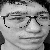

In [ ]:
caras[0][0]

In [ ]:
# Liberar espacio en memoria
del imagenes

## Analisis

In [ ]:
len(errores)

0

In [ ]:
for i in errores:
  cv2_imshow(i[0])

In [ ]:
# Libera memoria
del errores

## Escalar las fotos a 50x50 y pasarla a escala de grises

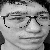

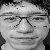

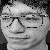

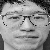

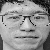

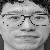

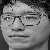

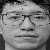

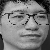

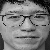

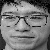

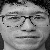

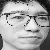

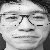

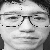

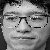

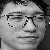

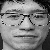

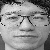

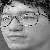

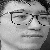

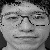

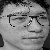

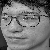

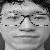

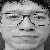

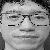

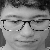

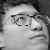

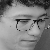

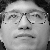

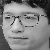

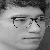

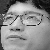

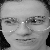

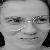

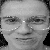

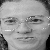

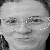

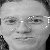

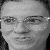

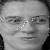

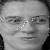

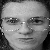

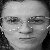

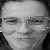

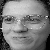

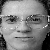

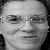

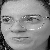

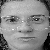

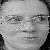

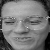

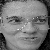

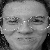

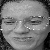

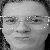

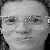

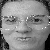

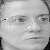

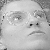

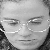

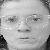

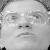

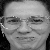

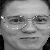

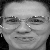

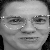

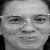

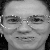

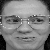

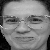

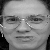

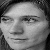

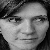

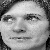

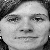

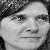

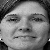

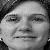

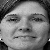

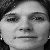

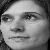

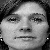

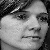

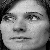

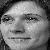

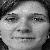

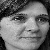

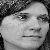

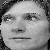

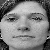

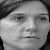

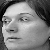

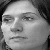

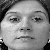

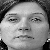

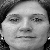

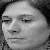

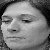

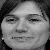

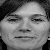

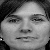

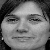

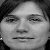

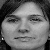

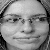

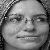

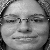

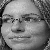

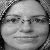

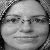

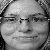

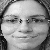

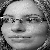

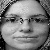

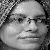

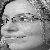

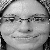

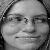

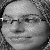

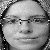

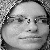

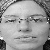

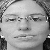

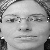

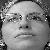

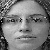

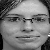

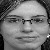

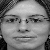

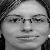

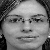

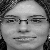

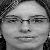

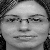

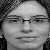

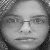

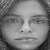

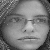

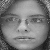

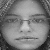

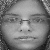

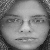

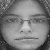

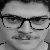

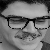

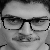

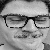

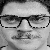

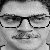

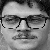

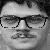

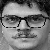

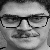

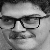

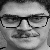

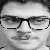

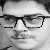

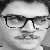

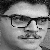

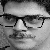

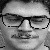

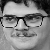

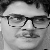

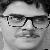

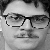

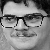

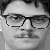

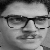

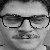

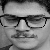

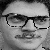

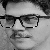

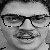

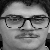

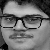

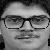

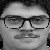

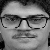

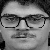

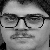

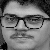

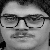

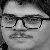

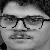

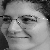

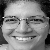

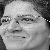

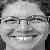

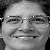

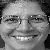

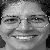

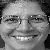

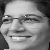

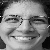

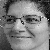

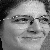

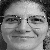

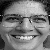

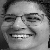

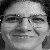

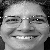

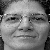

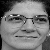

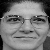

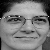

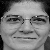

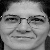

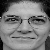

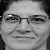

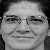

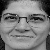

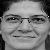

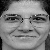

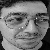

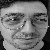

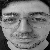

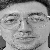

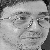

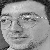

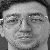

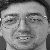

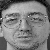

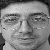

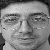

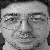

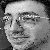

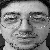

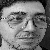

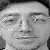

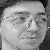

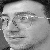

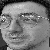

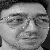

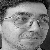

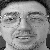

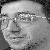

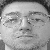

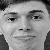

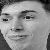

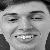

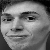

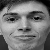

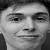

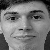

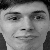

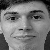

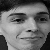

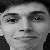

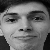

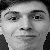

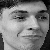

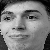

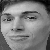

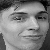

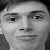

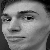

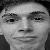

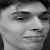

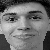

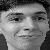

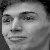

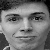

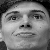

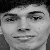

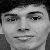

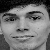

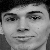

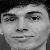

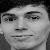

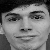

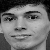

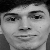

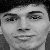

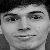

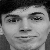

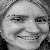

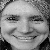

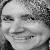

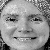

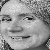

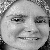

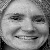

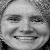

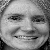

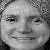

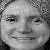

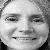

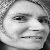

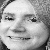

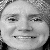

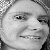

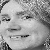

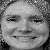

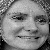

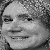

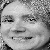

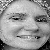

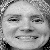

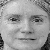

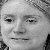

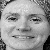

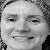

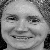

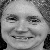

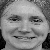

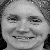

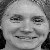

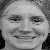

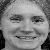

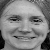

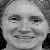

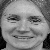

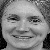

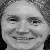

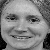

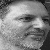

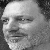

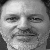

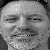

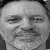

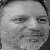

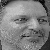

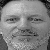

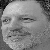

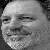

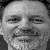

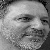

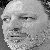

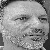

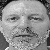

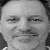

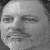

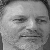

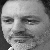

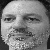

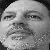

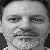

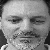

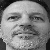

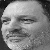

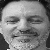

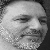

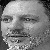

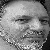

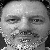

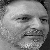

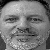

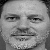

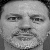

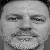

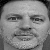

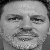

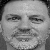

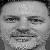

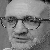

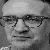

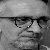

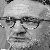

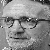

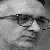

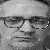

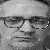

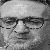

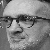

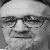

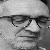

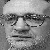

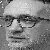

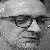

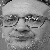

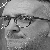

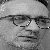

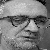

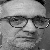

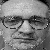

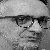

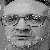

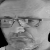

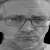

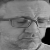

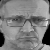

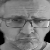

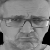

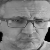

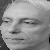

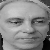

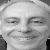

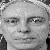

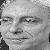

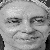

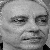

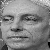

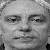

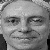

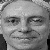

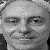

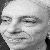

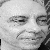

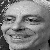

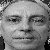

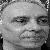

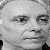

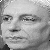

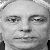

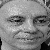

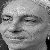

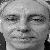

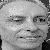

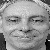

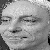

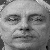

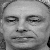

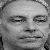

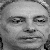

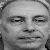

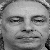

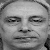

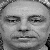

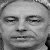

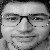

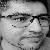

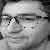

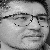

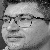

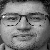

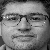

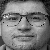

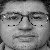

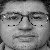

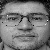

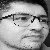

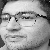

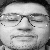

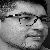

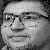

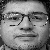

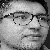

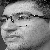

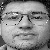

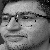

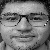

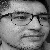

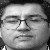

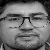

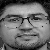

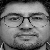

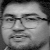

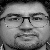

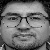

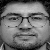

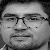

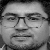

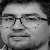

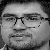

In [ ]:
# Pasar las fotos de la cara a una escala de 50x50

for i in range(len(caras)):
  caras[i][0] = cv2.resize(caras[i][0], (50, 50))
  cv2_imshow(caras[i][0])

In [ ]:
# Convertir cada matriz en un vector fila 1x2500
for i in range(len(caras)):
  caras[i][0] = cv2.cvtColor(caras[i][0], cv2.COLOR_BGR2GRAY).reshape(1, 2500)

In [ ]:
# prompt: create a script to save in drive the caras object

import pickle
caras_path = '/content/drive/My Drive/DMA/NuestrasCaras/caras50.pkl'

with open(caras_path, 'wb') as f:
  pickle.dump(caras, f)


# Funciones para dividir en training y testing

In [ ]:
import random
from collections import Counter

# Algoritmo para chequear la distribución de nombres
def check_separar(training_nombres):
  # Contar la frecuencia de cada palabra
  contador = Counter(training_nombres)
  total_palabras = sum(contador.values())
  cantidad_diferentes = len(contador)  # Número de palabras únicas

  # Convertir a porcentaje
  frecuencias = {palabra: (conteo / total_palabras) * 100 for palabra, conteo in contador.items()}

  umbral = 100 / cantidad_diferentes

  # Mostrar el gráfico si no es muy dispar
  if (min(frecuencias.values()) < umbral*.75 or max(frecuencias.values()) > umbral*1.25):
    return 0
  else:
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.bar(frecuencias.keys(), frecuencias.values(), color='skyblue')

    # Agregar línea horizontal en 100% / cantidad de palabras diferentes
    plt.axhline(y=umbral, color='red', linestyle='--', label=f"Ideal: {umbral:.2f}%")

    # Etiquetas
    plt.xlabel("Persona")
    plt.ylabel("Frecuencia (%)")
    plt.title("Distribución del training set según las personas")
    plt.ylim(0, max(frecuencias.values()) + 5)  # Ajuste del eje Y
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Algoritmo para separar training y testing suponiendo 2 listas
def separar_aleatorio(lista_caras, lista_nombres, porcentaje_training):
    if (len(lista_caras) != len(lista_nombres)):
      print("Error las listas deben tener la misma longitud")
    else:
      chequeo = 0

      while (chequeo == 0):
        training_caras = []
        training_nombres = []
        testing_caras = []
        testing_nombres = []

        for i in range(len(lista_caras)):
          aleatorio = random.random()
          if aleatorio <= porcentaje_training:
            training_caras.append(lista_caras[i])
            training_nombres.append(lista_nombres[i])
          else:
            testing_caras.append(lista_caras[i])
            testing_nombres.append(lista_nombres[i])
        chequeo = check_separar(training_nombres)

      return training_caras, training_nombres, testing_caras, testing_nombres



# ISOMAP

In [ ]:
import numpy as np
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Funciones de validación

In [ ]:

def validacion_ISOMAP(isomap, foto_prueba, nombre_prueba, transformed, nombres):
  foto_prueba = foto_prueba.reshape(1, 2500)
  foto_prueba2 = isomap.transform(foto_prueba)

  check = 0

  distancia = np.empty((len(transformed)))
  distancia = np.vstack((distancia, nombres)).T
  for i in range(len(transformed)):
    distancia[i, 0] = np.linalg.norm(foto_prueba2 - transformed[i])

  distancia = distancia[distancia[:, 0].argsort()]
  if (distancia[0, 1] == nombre_prueba):
    check = 1
  cv2_imshow(foto_prueba.reshape(50,50))
  print(f"{nombre_prueba} es más parecido a:\n")
  for i in range(10):
    print(f"{i+1}) {distancia[i, 1]} con una distancia de {distancia[i, 0]}")

  return check

def validacion_ISOMAP_2(isomap, foto_prueba, nombre_prueba, transformed, nombres):
  foto_prueba = foto_prueba.reshape(1, 2500)
  foto_prueba2 = isomap.transform(foto_prueba)

  check = 0

  distancia = np.empty((len(transformed)))
  distancia = np.vstack((distancia, nombres)).T
  for i in range(len(transformed)):
    distancia[i, 0] = np.linalg.norm(foto_prueba2 - transformed[i])

  distancia = distancia[distancia[:, 0].argsort()]
  if (distancia[0, 1] == nombre_prueba):
    check = 1

  return check


## Optimización de parámetos de ISOMAP con múltiples semillas

In [ ]:
faces = [sublista[0] for sublista in caras]
names = [sublista[1] for sublista in caras]

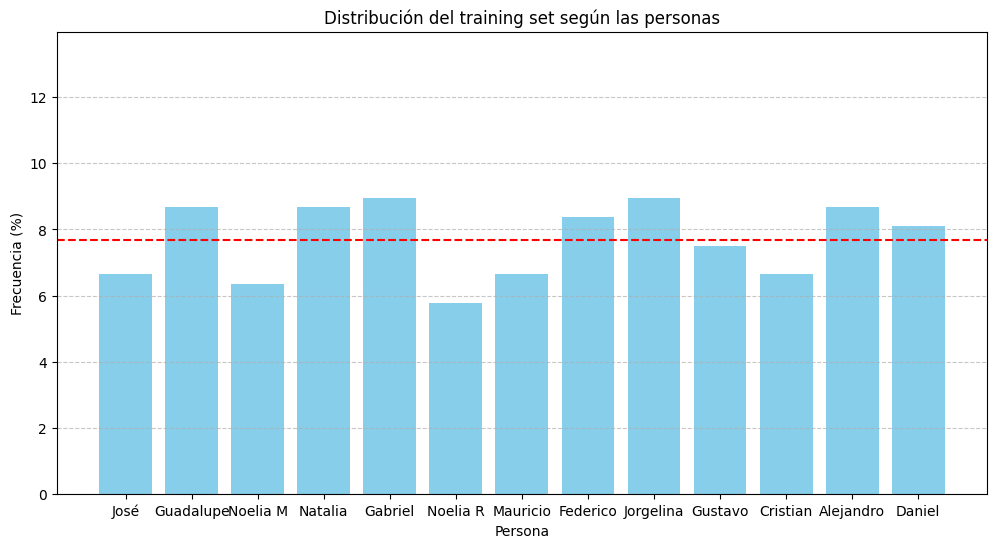

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

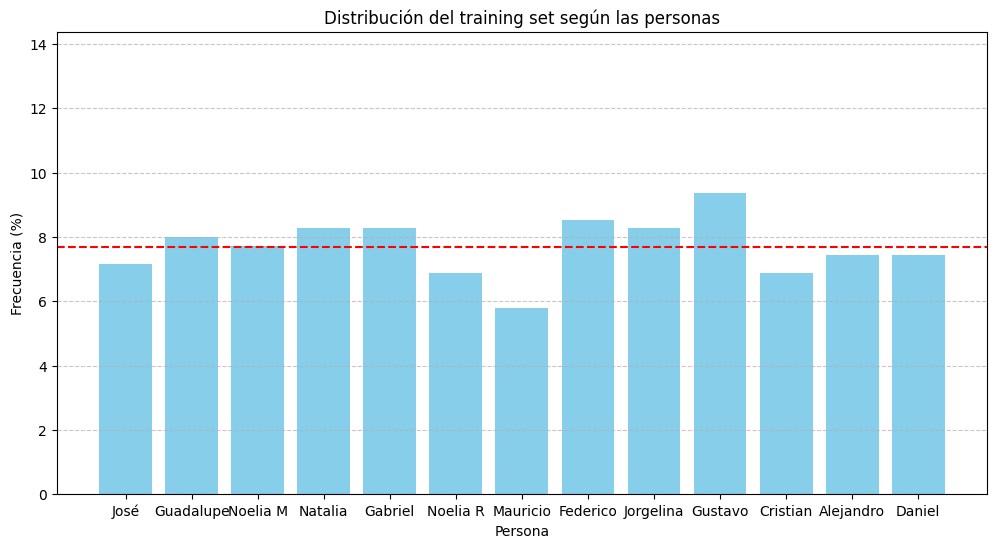

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

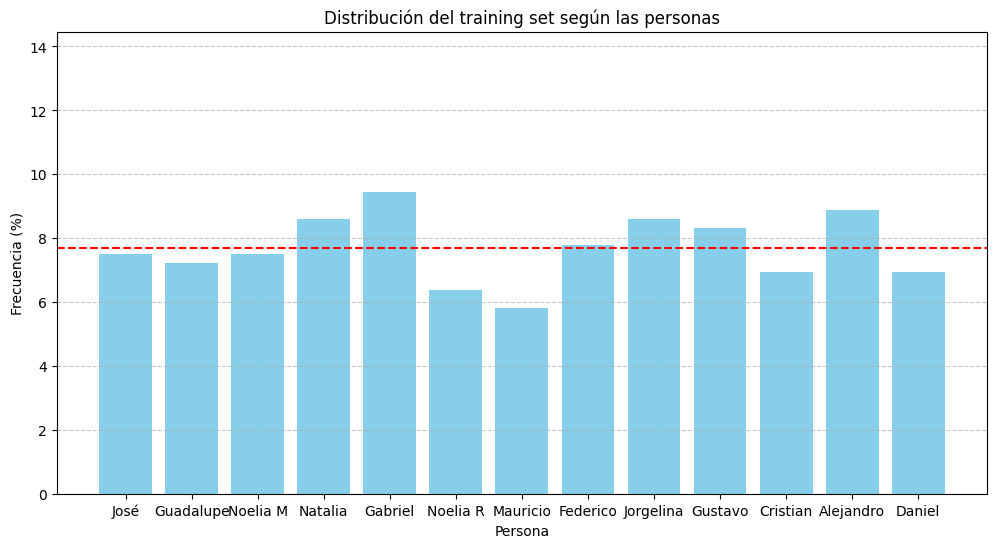

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

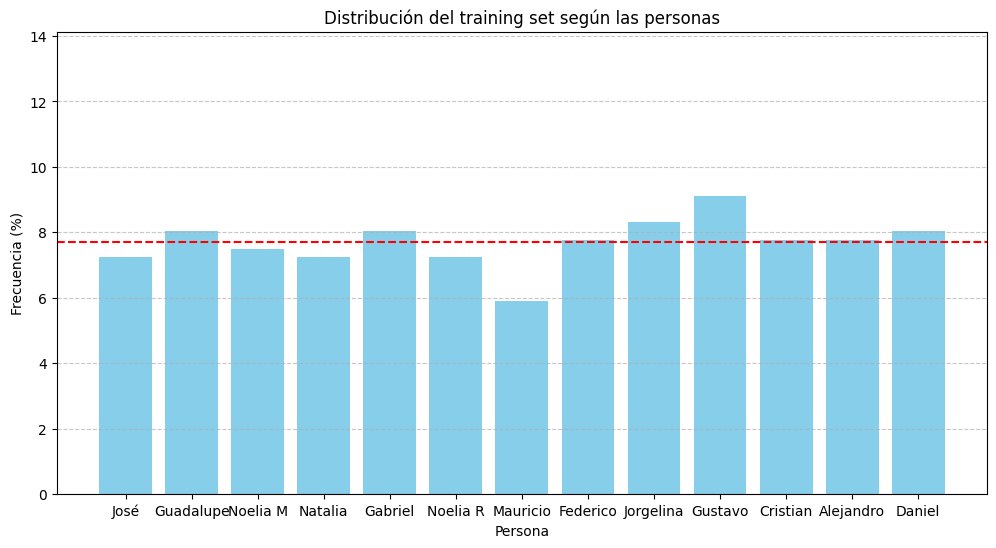

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

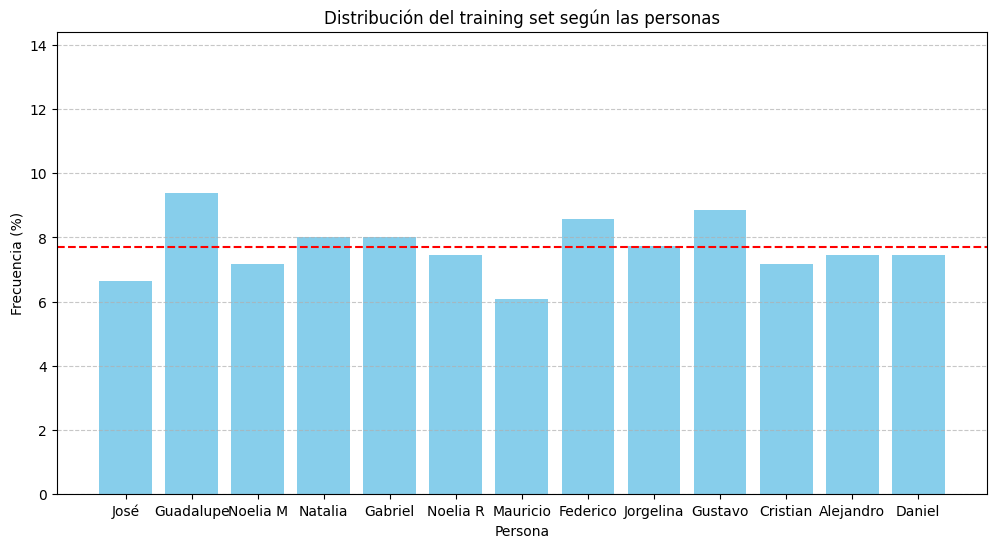

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

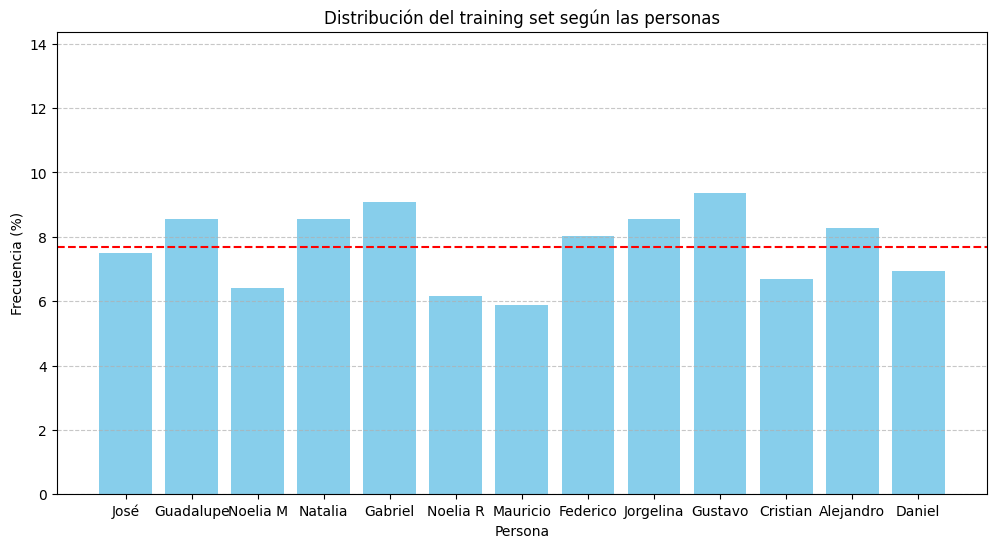

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

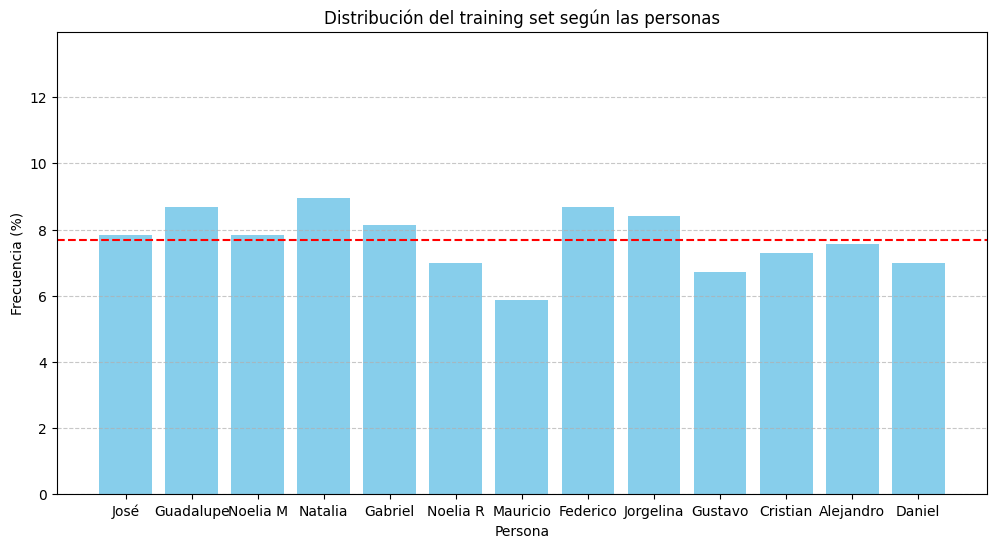

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

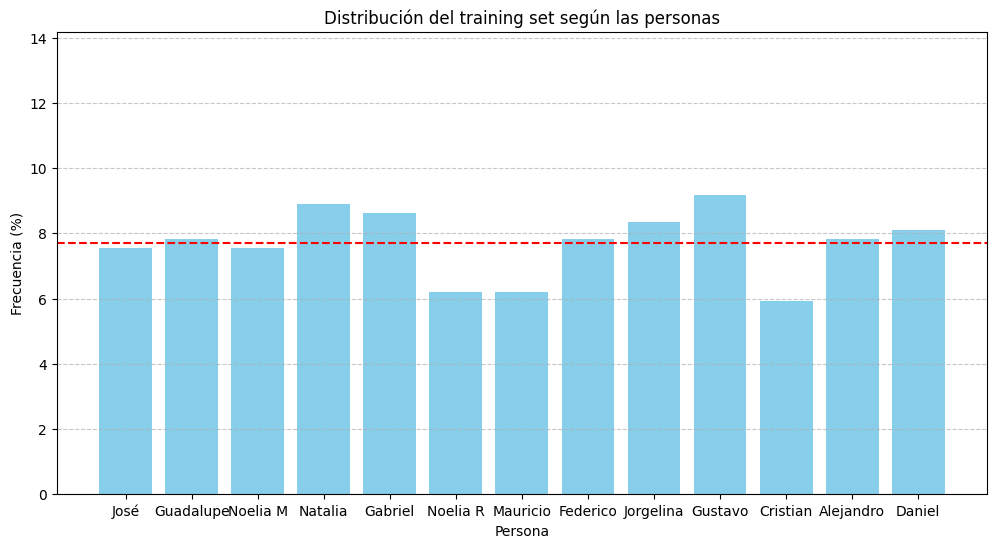

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

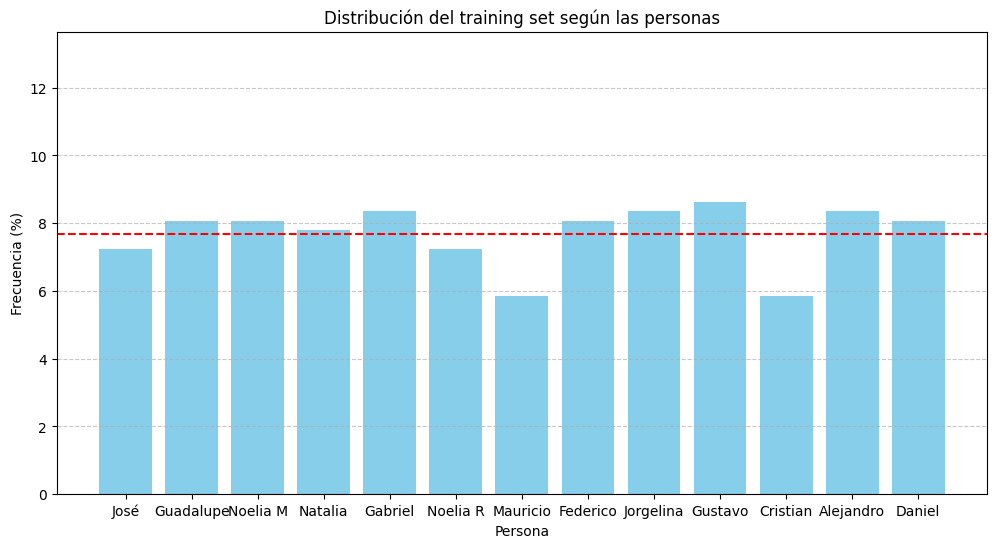

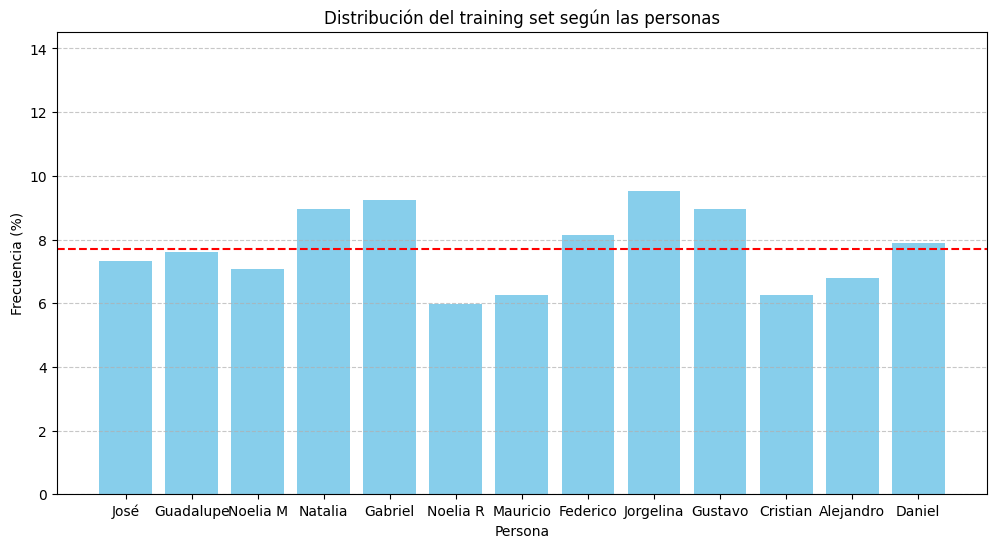

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

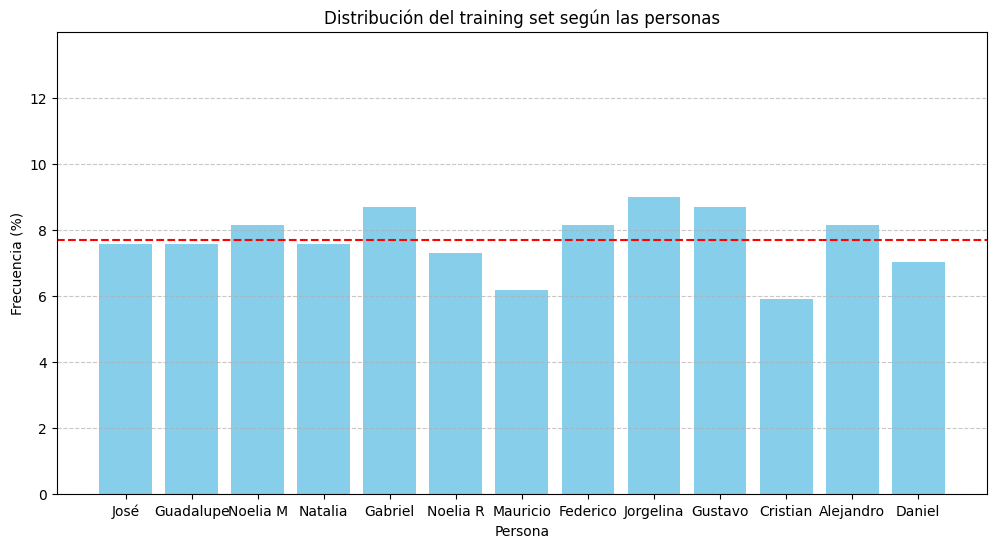

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

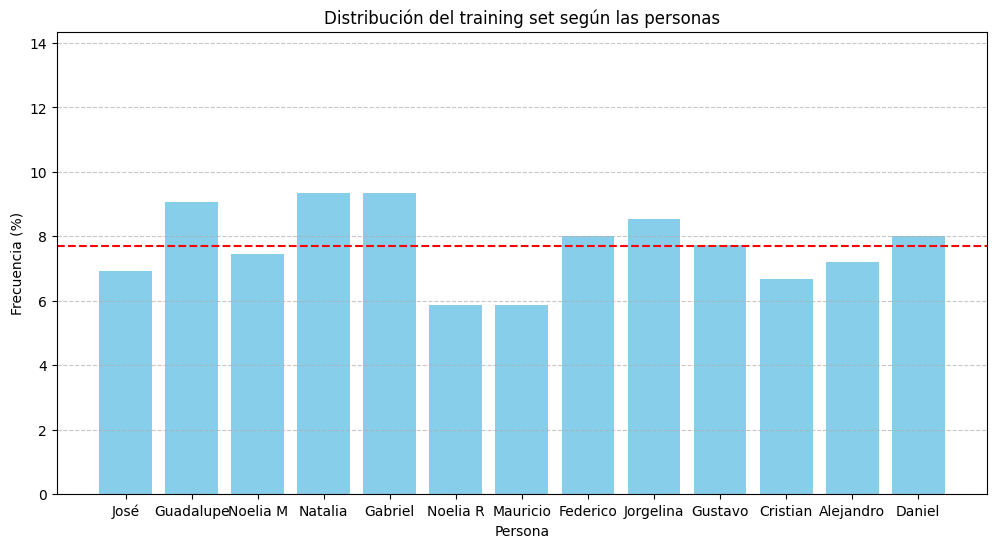

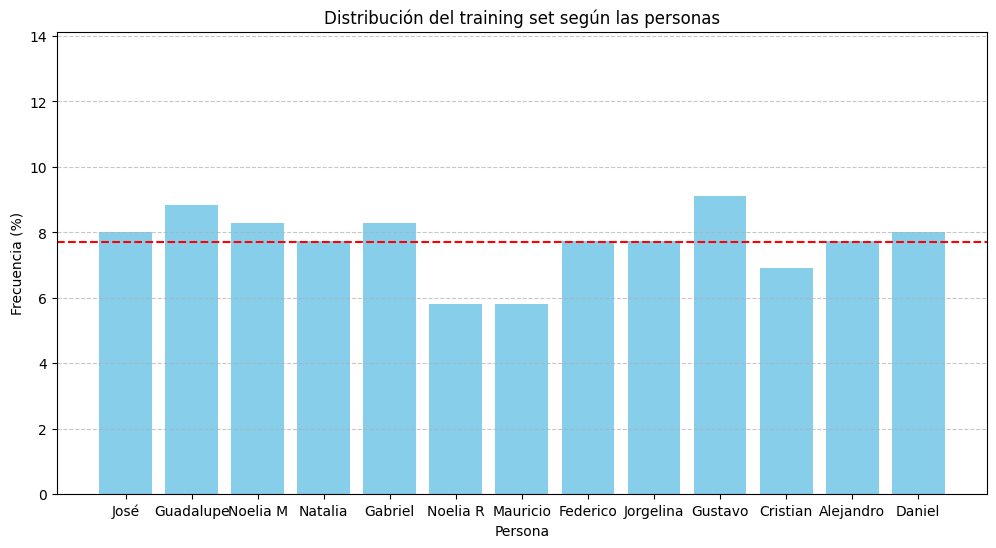

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

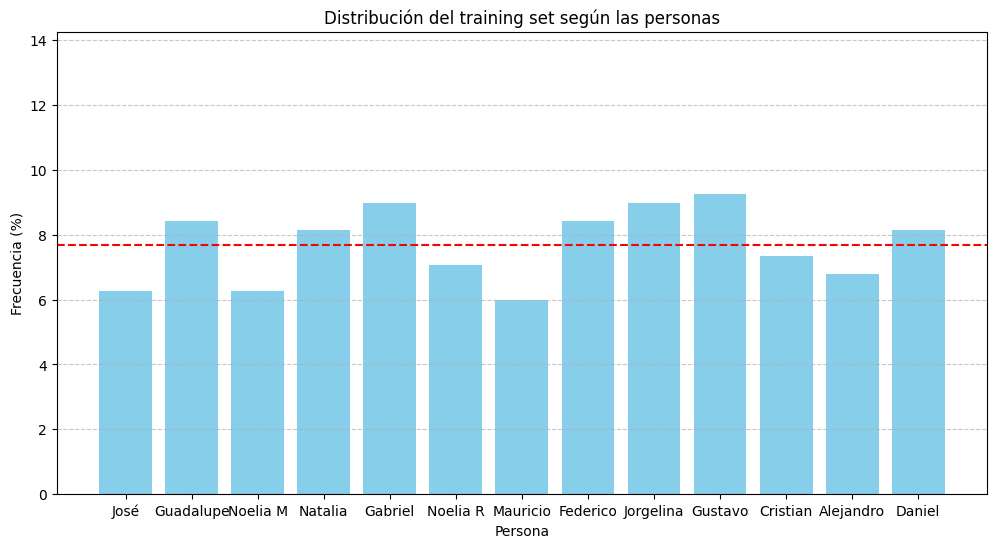

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn

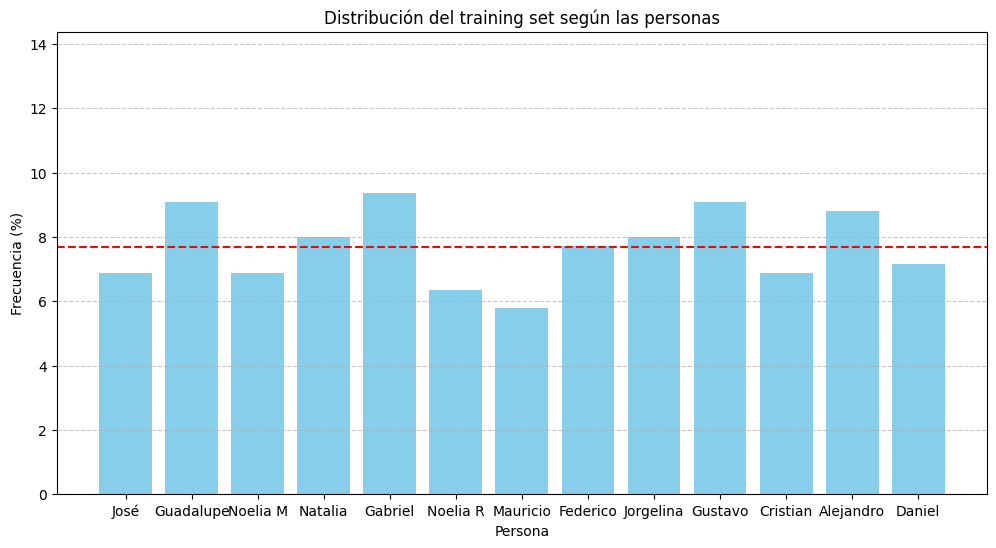

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarn


Las mejores tasas de acierto son:

Aciertos: 82.73% - Vecinos: 5 - Componentes: 80
Aciertos: 77.27% - Vecinos: 5 - Componentes: 70
Aciertos: 76.36% - Vecinos: 5 - Componentes: 50
Aciertos: 76.36% - Vecinos: 6 - Componentes: 80
Aciertos: 73.64% - Vecinos: 6 - Componentes: 70
Aciertos: 72.73% - Vecinos: 5 - Componentes: 60
Aciertos: 70.0% - Vecinos: 5 - Componentes: 35
Aciertos: 70.0% - Vecinos: 6 - Componentes: 60
Aciertos: 67.27% - Vecinos: 5 - Componentes: 40
Aciertos: 66.36% - Vecinos: 6 - Componentes: 50

Las mejores tasas de acierto son:

Aciertos: 80.65% - Vecinos: 6 - Componentes: 80
Aciertos: 78.49% - Vecinos: 6 - Componentes: 70
Aciertos: 76.34% - Vecinos: 6 - Componentes: 60
Aciertos: 75.27% - Vecinos: 6 - Componentes: 50
Aciertos: 73.12% - Vecinos: 5 - Componentes: 70
Aciertos: 70.97% - Vecinos: 6 - Componentes: 35
Aciertos: 70.97% - Vecinos: 5 - Componentes: 80
Aciertos: 68.82% - Vecinos: 5 - Componentes: 60
Aciertos: 67.74% - Vecinos: 6 - Componentes: 30
Aciertos: 65.59% -

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.manifold._isomap")
# Fijamos semillas aleatorias
semillas = [0, 2671, 638, 192, 2000, 1975, 7343, 9991, 5691, 1029384756, 67, 3728, 9264, 535, 1111]

# Fijamos los parámetros de ISOMAP
n_neighbors = [5, 6, 7, 8, 9, 10, 12, 15, 17, 20, 22, 25, 27, 30]

n_components = [15, 20, 25, 30, 35, 40, 50, 60, 70, 80]


# Defino el objeto donde almacenos los resultados
aciertos = []
aciertos_promedio = np.zeros((len(n_neighbors), len(n_components)))
for i in range(len(semillas)):
  random.seed(semillas[i])
  train_caras, train_nombres, test_caras, test_nombres = separar_aleatorio(faces, names, 0.8)

  aciertos.append(np.zeros((len(n_neighbors), len(n_components))))

  # Pasamos las caras de training y testing a listas
  data_training = []
  for j in range(len(train_caras)):
    data_training.append(train_caras[j])

  data_testing = []
  for j in range(len(test_caras)):
    data_testing.append(test_caras[j])

  # Convertimos las listas en matrices de tamaño (n, 900)
  data_training = np.vstack(data_training)
  data_testing = np.vstack(data_testing)

  for a in range(len(n_neighbors)):
    for b in range(len(n_components)):
      isomap = Isomap(n_neighbors=n_neighbors[a], n_components=n_components[b])
      training_transformed = isomap.fit_transform(data_training)

      cont = 0
      for k in range(len(data_testing)):
        cont += validacion_ISOMAP_2(isomap, data_testing[k], test_nombres[k], training_transformed, train_nombres)

      aciertos[i][a,b] = cont/len(data_testing)*100
      aciertos_promedio[a,b] += aciertos[i][a,b]/len(semillas)

# Se muestran las mejores 10 combinacions de neighbors y components para las 10 semillas
for i in range(len(aciertos)):
  # Aplanamos el array para encontrar los índices de los 3 valores más grandes
  flat_indices = np.argpartition(aciertos[i].ravel(), -10)[-10:]

  # Ordenamos esos índices en orden descendente según el valor real
  sorted_indices = flat_indices[np.argsort(aciertos[i].ravel()[flat_indices])[::-1]]

  # Convertimos los índices planos a coordenadas (fila, columna)
  coords = [np.unravel_index(z, aciertos[i].shape) for z in sorted_indices]

  # Obtenemos los valores correspondientes
  values = aciertos[i].ravel()[sorted_indices]

  print("\nLas mejores tasas de acierto son:\n")
  # Mostramos los resultados
  for val, (fila, col) in zip(values, coords):
    print(f"Aciertos: {round(val, 2)}% - Vecinos: {n_neighbors[fila]} - Componentes: {n_components[col]}")

# Se muestran las mejores combinaciones de neighbors y components en promedio
# Aplanamos el array para encontrar los índices de los 3 valores más grandes
flat_indices = np.argpartition(aciertos_promedio.ravel(), -10)[-10:]

# Ordenamos esos índices en orden descendente según el valor real
sorted_indices = flat_indices[np.argsort(aciertos_promedio.ravel()[flat_indices])[::-1]]

# Convertimos los índices planos a coordenadas (fila, columna)
coords = [np.unravel_index(i, aciertos_promedio.shape) for i in sorted_indices]

# Obtenemos los valores correspondientes
values = aciertos_promedio.ravel()[sorted_indices]
print("\n")
print("-"*30)
print("\n")
print("Las mejores tasas de acierto en promedio son:\n")
# Mostramos los resultados
for val, (fila, col) in zip(values, coords):
    print(f"Aciertos: {round(val, 2)}% - Vecinos: {n_neighbors[fila]} - Componentes: {n_components[col]}")


In [ ]:
# Se muestran las mejores combinaciones de neighbors y components en promedio
# Aplanamos el array para encontrar los índices de los 3 valores más grandes
flat_indices = np.argpartition(aciertos_promedio.ravel(), -25)[-25:]

# Ordenamos esos índices en orden descendente según el valor real
sorted_indices = flat_indices[np.argsort(aciertos_promedio.ravel()[flat_indices])[::-1]]

# Convertimos los índices planos a coordenadas (fila, columna)
coords = [np.unravel_index(i, aciertos_promedio.shape) for i in sorted_indices]

# Obtenemos los valores correspondientes
values = aciertos_promedio.ravel()[sorted_indices]
print("\n")
print("-"*30)
print("\n")
print("Las mejores tasas de acierto en promedio son:\n")
# Mostramos los resultados
for val, (fila, col) in zip(values, coords):
    print(f"Aciertos: {round(val, 2)}% - Vecinos: {n_neighbors[fila]} - Componentes: {n_components[col]}")



------------------------------


Las mejores tasas de acierto en promedio son:

Aciertos: 88.55% - Vecinos: 9 - Componentes: 80
Aciertos: 88.51% - Vecinos: 9 - Componentes: 70
Aciertos: 88.48% - Vecinos: 12 - Componentes: 80
Aciertos: 88.35% - Vecinos: 12 - Componentes: 70
Aciertos: 88.3% - Vecinos: 22 - Componentes: 50
Aciertos: 88.28% - Vecinos: 27 - Componentes: 80
Aciertos: 88.26% - Vecinos: 12 - Componentes: 50
Aciertos: 88.21% - Vecinos: 12 - Componentes: 40
Aciertos: 88.1% - Vecinos: 10 - Componentes: 50
Aciertos: 88.09% - Vecinos: 9 - Componentes: 35
Aciertos: 88.09% - Vecinos: 27 - Componentes: 60
Aciertos: 88.08% - Vecinos: 9 - Componentes: 60
Aciertos: 88.08% - Vecinos: 12 - Componentes: 25
Aciertos: 88.03% - Vecinos: 9 - Componentes: 40
Aciertos: 88.0% - Vecinos: 30 - Componentes: 60
Aciertos: 88.0% - Vecinos: 22 - Componentes: 40
Aciertos: 87.97% - Vecinos: 12 - Componentes: 60
Aciertos: 87.95% - Vecinos: 25 - Componentes: 60
Aciertos: 87.94% - Vecinos: 25 - Componentes:

## División entre Training y Testing set

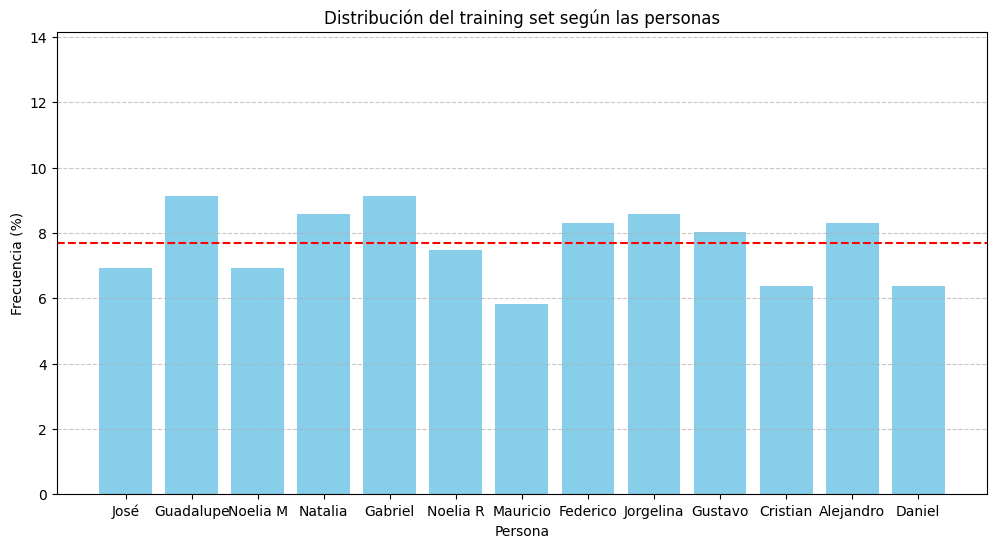

In [ ]:

faces = [sublista[0] for sublista in caras]
names = [sublista[1] for sublista in caras]

random.seed(76251)
train_caras, train_nombres, test_caras, test_nombres = separar_aleatorio(faces, names, .8)

## Corrida Final

In [ ]:
mejor_n_components = 80
mejor_n_neighbors = 30

In [ ]:
# Pasamos las caras de training y testing a listas
data_training = []
for j in range(len(train_caras)):
  data_training.append(train_caras[j])

data_testing = []
for j in range(len(test_caras)):
  data_testing.append(test_caras[j])

# Convertimos las listas en matrices de tamaño (n, 900)
data_training = np.vstack(data_training)
data_testing = np.vstack(data_testing)

In [ ]:
isomap = Isomap(n_components=mejor_n_components, n_neighbors=mejor_n_neighbors)
output_isomap_training = isomap.fit_transform(data_training)

output_isomap_testing = isomap.transform(data_testing)

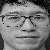

José es más parecido a:

1) José con una distancia de 3175.853821893337
2) José con una distancia de 4199.826236571892
3) José con una distancia de 4307.764649970551
4) José con una distancia de 4411.744033744379
5) José con una distancia de 4464.901040666557
6) José con una distancia de 4488.114290215597
7) José con una distancia de 4531.151831788538
8) José con una distancia de 4552.649712955663
9) Federico con una distancia de 4586.613512321128
10) Federico con una distancia de 4621.3564381761


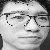

José es más parecido a:

1) José con una distancia de 4729.929770880634
2) Guadalupe con una distancia de 5063.12186795552
3) José con una distancia de 5180.188201995104
4) Mauricio con una distancia de 5189.248999762445
5) José con una distancia de 5220.783518816355
6) Jorgelina con una distancia de 5233.684265158696
7) José con una distancia de 5299.5572558350095
8) Alejandro con una distancia de 5348.550330640109
9) Alejandro con una distancia de 5371.483343214501
10) José con una distancia de 5399.20238160969


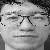

José es más parecido a:

1) José con una distancia de 2775.4702511470173
2) José con una distancia de 2885.243019619873
3) José con una distancia de 3188.234106080527
4) José con una distancia de 3442.0291135157872
5) José con una distancia de 3477.2618741823962
6) José con una distancia de 3731.292530465429
7) José con una distancia de 4012.332441178146
8) José con una distancia de 4046.2943764610977
9) Gustavo con una distancia de 4316.485598504317
10) Gustavo con una distancia de 4367.031373538226


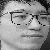

José es más parecido a:

1) Daniel con una distancia de 4103.1251609216515
2) Gustavo con una distancia de 4225.97861531828
3) Gustavo con una distancia de 4245.814357819618
4) Daniel con una distancia de 4248.587835151857
5) Gustavo con una distancia de 4255.46794786883
6) Gustavo con una distancia de 4308.850728701906
7) Mauricio con una distancia de 4331.923005303898
8) José con una distancia de 4367.598792439066
9) José con una distancia de 4430.1806806854065
10) Guadalupe con una distancia de 4441.181694848381


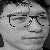

José es más parecido a:

1) Mauricio con una distancia de 3389.3052302543792
2) Federico con una distancia de 3763.757455043824
3) Federico con una distancia de 3994.003676377086
4) Federico con una distancia de 4022.237680850761
5) José con una distancia de 4024.159801995607
6) José con una distancia de 4124.526929084304
7) José con una distancia de 4124.789185466827
8) Federico con una distancia de 4478.059477774304
9) Gustavo con una distancia de 4531.637837644595
10) José con una distancia de 4609.339993074062


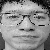

José es más parecido a:

1) José con una distancia de 2279.9474632204306
2) José con una distancia de 2373.034797470933
3) José con una distancia de 2760.2622552108796
4) José con una distancia de 3253.39894349626
5) José con una distancia de 3387.995176177652
6) José con una distancia de 3490.0138982910166
7) José con una distancia de 3619.00132222164
8) Gustavo con una distancia de 4285.66967438103
9) José con una distancia de 4300.155242345604
10) Gustavo con una distancia de 4429.897198341329


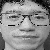

José es más parecido a:

1) José con una distancia de 2128.0253999059805
2) José con una distancia de 2342.2651030134957
3) José con una distancia de 2370.6223585967546
4) José con una distancia de 2980.3036314885735
5) José con una distancia de 3284.5446725296247
6) José con una distancia de 3381.4739804737264
7) José con una distancia de 3853.6487822541912
8) José con una distancia de 4122.5423292804935
9) Gustavo con una distancia de 4236.683229678659
10) José con una distancia de 4358.345253899166


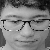

José es más parecido a:

1) Mauricio con una distancia de 4277.211401804591
2) Mauricio con una distancia de 4277.211401804591
3) Mauricio con una distancia de 4281.014840835031
4) Gustavo con una distancia de 4335.888136966013
5) Gustavo con una distancia de 4344.05398650748
6) José con una distancia de 4344.3592334064615
7) Mauricio con una distancia de 4365.721834986037
8) Mauricio con una distancia de 4463.97144267325
9) Gustavo con una distancia de 4464.67691441798
10) Gustavo con una distancia de 4465.378909714535


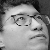

José es más parecido a:

1) Federico con una distancia de 4893.83549899768
2) Mauricio con una distancia de 5127.04012181928
3) Federico con una distancia de 5208.694508937647
4) José con una distancia de 5453.175602921248
5) Mauricio con una distancia de 5478.020984925342
6) José con una distancia de 5505.813316136855
7) Gustavo con una distancia de 5515.775372310552
8) Noelia M con una distancia de 5517.972605978201
9) José con una distancia de 5520.014358761217
10) Mauricio con una distancia de 5622.746476305898


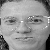

Guadalupe es más parecido a:

1) Guadalupe con una distancia de 2001.8159556310363
2) Guadalupe con una distancia de 2270.054745988882
3) Guadalupe con una distancia de 2895.8362555414333
4) Guadalupe con una distancia de 2940.6863982606515
5) Guadalupe con una distancia de 2973.8945635130945
6) Guadalupe con una distancia de 3167.1153065578737
7) Guadalupe con una distancia de 3329.1717120537573
8) Alejandro con una distancia de 3472.242535481456
9) Guadalupe con una distancia de 3556.8427031189867
10) Guadalupe con una distancia de 3696.783770184055


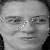

Guadalupe es más parecido a:

1) Guadalupe con una distancia de 1.0516490298595991e-11
2) Guadalupe con una distancia de 3597.95670498249
3) Guadalupe con una distancia de 3615.1036141380214
4) Guadalupe con una distancia de 3775.6756284737485
5) Guadalupe con una distancia de 3827.946746539346
6) Guadalupe con una distancia de 3883.778357705952
7) Guadalupe con una distancia de 3894.333941587308
8) Gustavo con una distancia de 3894.57652512325
9) Guadalupe con una distancia de 3963.7615462512663
10) Guadalupe con una distancia de 3965.9720077674456


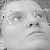

Guadalupe es más parecido a:

1) Federico con una distancia de 10044.57126300872
2) Noelia M con una distancia de 10114.381131347383
3) Federico con una distancia de 10124.696786505376
4) Gabriel con una distancia de 10240.420124750628
5) Gabriel con una distancia de 10277.79449689098
6) Gabriel con una distancia de 10335.568983656249
7) Federico con una distancia de 11060.2382681339
8) Guadalupe con una distancia de 3863.825688225452
9) Guadalupe con una distancia de 5160.026629621009
10) Alejandro con una distancia de 5669.718767219801


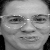

Guadalupe es más parecido a:

1) Guadalupe con una distancia de 1901.0233197257005
2) Guadalupe con una distancia de 3181.3104758431655
3) Gustavo con una distancia de 3639.4189673494184
4) Gustavo con una distancia de 3662.694032214414
5) Guadalupe con una distancia de 3811.852607182643
6) Gustavo con una distancia de 3833.0493046426354
7) Jorgelina con una distancia de 3892.060252778414
8) Alejandro con una distancia de 3895.704994620853
9) Guadalupe con una distancia de 3939.055705282413
10) Jorgelina con una distancia de 3952.234874934987


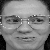

Guadalupe es más parecido a:

1) Guadalupe con una distancia de 3205.504598211908
2) Guadalupe con una distancia de 3221.360842592489
3) Guadalupe con una distancia de 3441.416608521493
4) Guadalupe con una distancia de 3464.0085256250745
5) Jorgelina con una distancia de 3714.154331687814
6) Guadalupe con una distancia de 3875.082200968463
7) Jorgelina con una distancia de 3971.22602237141
8) Jorgelina con una distancia de 4042.8004825693956
9) Jorgelina con una distancia de 4051.1158432454286
10) Jorgelina con una distancia de 4054.940308990098


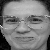

Guadalupe es más parecido a:

1) Guadalupe con una distancia de 2545.8386013716213
2) Guadalupe con una distancia de 2625.2038464526877
3) Guadalupe con una distancia de 2710.624890970707
4) Guadalupe con una distancia de 2872.96046913035
5) Jorgelina con una distancia de 3494.7284076472515
6) Jorgelina con una distancia de 3662.4659439415677
7) Jorgelina con una distancia de 3690.8333808238663
8) Jorgelina con una distancia de 3705.7874451718976
9) Jorgelina con una distancia de 3842.1974438753596
10) Guadalupe con una distancia de 3866.5302215995366


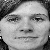

Noelia M es más parecido a:

1) Noelia R con una distancia de 4335.700456705541
2) Noelia R con una distancia de 4594.647192273488
3) Noelia R con una distancia de 4667.609227444757
4) Noelia M con una distancia de 4733.411286650066
5) Natalia con una distancia de 5048.050821136449
6) Noelia M con una distancia de 5187.952872368924
7) Gustavo con una distancia de 5204.979202463027
8) Noelia M con una distancia de 5210.057207792509
9) Noelia M con una distancia de 5292.044864014529
10) Noelia M con una distancia de 5298.323344261588


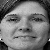

Noelia M es más parecido a:

1) Noelia M con una distancia de 1188.8314858957008
2) Noelia M con una distancia de 1969.4904826161273
3) Noelia M con una distancia de 3711.1109306264693
4) Noelia M con una distancia de 3833.553363366406
5) Federico con una distancia de 4416.94021328777
6) Noelia M con una distancia de 4546.027636783227
7) Federico con una distancia de 4611.330022660291
8) Noelia R con una distancia de 4701.778488690429
9) Noelia R con una distancia de 4722.33296999217
10) Noelia R con una distancia de 4739.616483261416


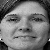

Noelia M es más parecido a:

1) Noelia M con una distancia de 1188.8314858957008
2) Noelia M con una distancia de 1969.4904826161273
3) Noelia M con una distancia de 3711.1109306264693
4) Noelia M con una distancia de 3833.553363366406
5) Federico con una distancia de 4416.94021328777
6) Noelia M con una distancia de 4546.027636783227
7) Federico con una distancia de 4611.330022660291
8) Noelia R con una distancia de 4701.778488690429
9) Noelia R con una distancia de 4722.33296999217
10) Noelia R con una distancia de 4739.616483261416


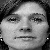

Noelia M es más parecido a:

1) Guadalupe con una distancia de 10031.278688008666
2) Noelia M con una distancia de 3814.995024122069
3) Noelia M con una distancia de 4081.090966967514
4) Noelia M con una distancia de 4095.1036530254655
5) Noelia M con una distancia de 4486.791083202461
6) Noelia M con una distancia de 4526.834261986122
7) Noelia M con una distancia de 4541.095088483165
8) Noelia M con una distancia de 4702.677390116709
9) Noelia M con una distancia de 4958.2401493256
10) Noelia M con una distancia de 4995.586824847533


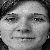

Noelia M es más parecido a:

1) Noelia M con una distancia de 1730.5033816845962
2) Noelia M con una distancia de 2171.3390648603645
3) Noelia M con una distancia de 3597.2807042519503
4) Noelia M con una distancia de 3800.4152216439757
5) Federico con una distancia de 4206.459358127096
6) Federico con una distancia de 4407.823345230574
7) Noelia M con una distancia de 4499.592458057647
8) Federico con una distancia de 4705.487487278005
9) Noelia R con una distancia de 4707.118723946989
10) Federico con una distancia de 4744.115149845429


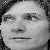

Noelia M es más parecido a:

1) Noelia R con una distancia de 4849.511218910812
2) Noelia R con una distancia de 4921.325570079426
3) Gustavo con una distancia de 4979.187900674525
4) Noelia M con una distancia de 5015.0925298175125
5) Noelia M con una distancia de 5055.978409003826
6) Noelia R con una distancia de 5059.317408936904
7) Noelia M con una distancia de 5060.80867438441
8) Guadalupe con una distancia de 5169.814301525879
9) Noelia M con una distancia de 5231.917180860553
10) Noelia M con una distancia de 5246.924184100658


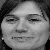

Noelia M es más parecido a:

1) Noelia M con una distancia de 1535.9847818788005
2) Noelia M con una distancia de 2041.3032327714955
3) Noelia M con una distancia de 2128.0184464228855
4) Noelia M con una distancia de 3544.960577158296
5) Natalia con una distancia de 4288.595766860952
6) Natalia con una distancia de 4448.289649297449
7) Natalia con una distancia de 4638.862688285071
8) Natalia con una distancia de 4668.890421618896
9) Natalia con una distancia de 4734.669278859844
10) Natalia con una distancia de 4761.248409086109


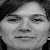

Noelia M es más parecido a:

1) Noelia M con una distancia de 3510.2660594248177
2) Noelia M con una distancia de 3792.435198976583
3) Noelia M con una distancia de 3957.644639500809
4) Noelia M con una distancia de 4062.972821281562
5) Natalia con una distancia de 4450.19499618318
6) Noelia M con una distancia de 4499.6912816723425
7) Natalia con una distancia de 4630.475912012311
8) Natalia con una distancia de 4663.225796097151
9) Natalia con una distancia de 4704.358926612158
10) Natalia con una distancia de 4789.1112206487005


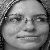

Natalia es más parecido a:

1) Natalia con una distancia de 2734.8710728321
2) Natalia con una distancia de 4751.43202033658
3) Natalia con una distancia de 4764.52952560882
4) Natalia con una distancia de 4833.862773101649
5) Natalia con una distancia de 4833.8627731016495
6) Natalia con una distancia de 4859.922320479257
7) Natalia con una distancia de 5003.575395219787
8) Natalia con una distancia de 5099.597576212072
9) Natalia con una distancia de 5153.427140731836
10) Guadalupe con una distancia de 5154.327505638863


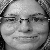

Natalia es más parecido a:

1) Natalia con una distancia de 2862.166577925343
2) Natalia con una distancia de 4663.735331279467
3) Jorgelina con una distancia de 4974.522129901149
4) Natalia con una distancia de 5064.254959314539
5) Natalia con una distancia de 5064.2549593145395
6) Guadalupe con una distancia de 5074.230884243808
7) Noelia R con una distancia de 5150.768105349387
8) Jorgelina con una distancia de 5155.111649249325
9) Jorgelina con una distancia de 5160.9477745038075
10) Natalia con una distancia de 5211.6157658399


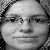

Natalia es más parecido a:

1) Natalia con una distancia de 3835.054739898546
2) Natalia con una distancia de 4853.929001303726
3) Natalia con una distancia de 4853.929001303727
4) Natalia con una distancia de 5066.210154355043
5) Natalia con una distancia de 5132.2037532795075
6) Natalia con una distancia de 5243.393169246788
7) Natalia con una distancia de 5277.4195813765555
8) Jorgelina con una distancia de 5449.820323815579
9) Natalia con una distancia de 5499.25979506412
10) Jorgelina con una distancia de 5521.215163813123


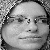

Natalia es más parecido a:

1) Jorgelina con una distancia de 3772.3543960243755
2) Natalia con una distancia de 4272.483733553456
3) Jorgelina con una distancia de 4673.304686363241
4) Natalia con una distancia de 4740.7135682555245
5) Guadalupe con una distancia de 5003.148760797552
6) Gustavo con una distancia de 5035.739149981074
7) Guadalupe con una distancia de 5048.9809029376875
8) Natalia con una distancia de 5140.984020385812
9) Guadalupe con una distancia de 5207.608494434578
10) Natalia con una distancia de 5207.743614119603


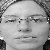

Natalia es más parecido a:

1) Natalia con una distancia de 2980.024792326514
2) Jorgelina con una distancia de 3436.5852787304893
3) Jorgelina con una distancia de 3641.5163570069444
4) Alejandro con una distancia de 3814.8445420496214
5) Natalia con una distancia de 3995.514113977764
6) Alejandro con una distancia de 4042.2846571009186
7) Guadalupe con una distancia de 4230.558576592722
8) Guadalupe con una distancia de 4234.910287757223
9) Natalia con una distancia de 4349.184124894132
10) Alejandro con una distancia de 4362.834626873342


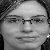

Natalia es más parecido a:

1) Natalia con una distancia de 2066.319856564391
2) Natalia con una distancia de 2126.4688286740843
3) Natalia con una distancia de 2463.3481158577533
4) Natalia con una distancia de 3223.208333163785
5) Natalia con una distancia de 4316.484791401742
6) Natalia con una distancia de 4343.676282353565
7) Noelia R con una distancia de 4413.741277056792
8) Natalia con una distancia de 4438.596482926459
9) Noelia R con una distancia de 4511.079573619675
10) Natalia con una distancia de 4517.914002236015


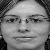

Natalia es más parecido a:

1) Natalia con una distancia de 2981.999463953381
2) Natalia con una distancia de 3026.8758192370765
3) Natalia con una distancia de 3211.481120742058
4) Natalia con una distancia de 3269.8571909638786
5) Natalia con una distancia de 3579.078581506241
6) Natalia con una distancia de 3937.7051078120303
7) Noelia R con una distancia de 4203.612381080941
8) Noelia R con una distancia de 4230.124805881642
9) Guadalupe con una distancia de 4241.679985672281
10) Jorgelina con una distancia de 4257.062348289535


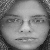

Natalia es más parecido a:

1) Natalia con una distancia de 1247.5231633809142
2) Natalia con una distancia de 1584.5802020619064
3) Natalia con una distancia de 2092.34953912161
4) Natalia con una distancia de 2492.052490987234
5) Natalia con una distancia de 2748.23985694048
6) Natalia con una distancia de 3245.1041151846953
7) Natalia con una distancia de 3568.8156309478672
8) Natalia con una distancia de 4008.5681034533454
9) Natalia con una distancia de 4248.752271752742
10) Guadalupe con una distancia de 4275.4655598639565


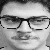

Gabriel es más parecido a:

1) Gabriel con una distancia de 3270.413826003843
2) Gabriel con una distancia de 4537.89655726456
3) Gabriel con una distancia de 4800.82362638005
4) Gabriel con una distancia de 4855.294490942369
5) Gabriel con una distancia de 5199.757817264723
6) Gustavo con una distancia de 5267.123198071647
7) Gustavo con una distancia de 5341.550460063996
8) Gabriel con una distancia de 5354.246276081984
9) Gustavo con una distancia de 5358.327483030397
10) Gustavo con una distancia de 5467.888780516436


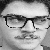

Gabriel es más parecido a:

1) Gabriel con una distancia de 5677.92201909233
2) Gabriel con una distancia de 5872.459158708016
3) Gustavo con una distancia de 5997.456489479067
4) Gabriel con una distancia de 6069.571991871079
5) Gustavo con una distancia de 6084.639293475594
6) Guadalupe con una distancia de 6143.61728413781
7) Gabriel con una distancia de 6177.048440198099
8) Gabriel con una distancia de 6255.064974843689
9) Gustavo con una distancia de 6293.585569578796
10) Gabriel con una distancia de 6301.4577832768455


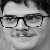

Gabriel es más parecido a:

1) Gabriel con una distancia de 3094.330622992125
2) Gabriel con una distancia de 4401.914117414639
3) Daniel con una distancia de 4592.786595106174
4) Gabriel con una distancia de 4722.645712860888
5) Gustavo con una distancia de 4752.4051276888395
6) Gustavo con una distancia de 4765.90883310232
7) Gustavo con una distancia de 4786.108672400892
8) Gustavo con una distancia de 4840.721687249327
9) Daniel con una distancia de 4862.455749082344
10) Daniel con una distancia de 4875.638434374693


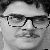

Gabriel es más parecido a:

1) Gabriel con una distancia de 1002.2904974491714
2) Gabriel con una distancia de 4652.403854911097
3) Gabriel con una distancia de 4736.101615147322
4) Gustavo con una distancia de 5221.325029295297
5) Gustavo con una distancia de 5280.489807208414
6) Gustavo con una distancia de 5295.892838413296
7) Gustavo con una distancia de 5312.189779142856
8) Gustavo con una distancia de 5320.591280345681
9) Gabriel con una distancia de 5362.5615959733805
10) Gustavo con una distancia de 5462.205354193474


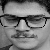

Gabriel es más parecido a:

1) Gabriel con una distancia de 4407.78961516882
2) Gabriel con una distancia de 4488.556020174131
3) Gabriel con una distancia de 4566.77637727167
4) Gabriel con una distancia de 4566.776377271671
5) Gustavo con una distancia de 4677.044252267331
6) Gustavo con una distancia de 4759.172221460152
7) Gabriel con una distancia de 4859.84377493681
8) Gustavo con una distancia de 4991.40348153661
9) Gustavo con una distancia de 5070.852738129902
10) Gabriel con una distancia de 5240.304354813645


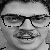

Gabriel es más parecido a:

1) Gabriel con una distancia de 2846.428463470836
2) Gabriel con una distancia de 3063.031229867478
3) Gabriel con una distancia de 3557.3717645060633
4) Gabriel con una distancia de 3557.3717645060638
5) Gabriel con una distancia de 3569.854586084996
6) Gabriel con una distancia de 3640.8972847329746
7) Gabriel con una distancia de 3702.5101411906676
8) Gabriel con una distancia de 3972.9038860820265
9) Gustavo con una distancia de 4006.0030075264885
10) Gabriel con una distancia de 4017.1395758165527


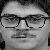

Gabriel es más parecido a:

1) Gabriel con una distancia de 2987.8108385599553
2) Gabriel con una distancia de 4144.210536856484
3) Daniel con una distancia de 4242.320716405823
4) Gabriel con una distancia de 4474.713252062151
5) Gustavo con una distancia de 4499.957315067192
6) Daniel con una distancia de 4562.309966833232
7) Gabriel con una distancia de 4661.55917708259
8) Daniel con una distancia de 4675.218211511936
9) Gabriel con una distancia de 4684.079013964933
10) Gabriel con una distancia de 4811.982237794118


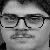

Gabriel es más parecido a:

1) Gabriel con una distancia de 2592.923807937839
2) Gabriel con una distancia de 3941.2274466458207
3) Daniel con una distancia de 4397.929644624044
4) Gabriel con una distancia de 4442.089270820065
5) Daniel con una distancia de 4507.663906913249
6) Daniel con una distancia de 4547.925298978919
7) Gabriel con una distancia de 4553.135616986184
8) Gabriel con una distancia de 4602.836113072398
9) Gustavo con una distancia de 4714.514629074083
10) Gabriel con una distancia de 4750.860026456614


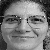

Noelia R es más parecido a:

1) Noelia R con una distancia de 2724.370083683644
2) Noelia R con una distancia de 3688.540322056712
3) Noelia R con una distancia de 3803.650474108965
4) Noelia R con una distancia de 3814.5994243932923
5) Noelia R con una distancia de 3824.078407324882
6) Noelia R con una distancia de 3827.2706987305623
7) Natalia con una distancia de 4001.1079179106446
8) Jorgelina con una distancia de 4039.95895091227
9) Noelia R con una distancia de 4108.927698035404
10) Noelia R con una distancia de 4124.424355923321


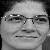

Noelia R es más parecido a:

1) Noelia R con una distancia de 2438.7043779865053
2) Noelia R con una distancia de 2913.684715741149
3) Noelia R con una distancia de 2965.4380999330215
4) Noelia R con una distancia de 2980.6027946323666
5) Noelia R con una distancia de 3656.652267820149
6) Noelia R con una distancia de 3786.625149058645
7) Noelia R con una distancia de 3866.8402921094585
8) Noelia R con una distancia de 3997.754989721851
9) Natalia con una distancia de 4036.7399694861265
10) Noelia R con una distancia de 4054.1479363349385


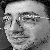

Mauricio es más parecido a:

1) Federico con una distancia de 4052.4906890531524
2) Gustavo con una distancia de 4513.840356181892
3) Mauricio con una distancia de 4877.986597174456
4) Gustavo con una distancia de 5116.021586905649
5) Gustavo con una distancia de 5137.888453050086
6) Gustavo con una distancia de 5224.823362590856
7) Mauricio con una distancia de 5245.496382901085
8) Gustavo con una distancia de 5256.89589917222
9) Gustavo con una distancia de 5288.351652241788
10) Gustavo con una distancia de 5325.140888270411


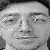

Mauricio es más parecido a:

1) Mauricio con una distancia de 2957.4602985439237
2) Mauricio con una distancia de 3581.361831180173
3) Mauricio con una distancia de 3948.332944046971
4) Mauricio con una distancia de 4008.5079530978837
5) Mauricio con una distancia de 4098.496284614566
6) Mauricio con una distancia de 4166.831999305324
7) Mauricio con una distancia de 4166.831999305324
8) Gustavo con una distancia de 4262.855111068525
9) José con una distancia de 4288.375082746301
10) José con una distancia de 4290.655326860643


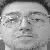

Mauricio es más parecido a:

1) Mauricio con una distancia de 3474.4723249651684
2) José con una distancia de 4109.933080309204
3) Mauricio con una distancia de 4227.528019513617
4) José con una distancia de 4233.977376865877
5) Mauricio con una distancia de 4363.06813261575
6) José con una distancia de 4428.664303619529
7) José con una distancia de 4529.946594734828
8) Mauricio con una distancia de 4540.081673114283
9) Mauricio con una distancia de 4619.215072808084
10) Mauricio con una distancia de 4669.009714070403


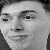

Federico es más parecido a:

1) Gustavo con una distancia de 3551.207314756439
2) Gustavo con una distancia de 3695.2763920594944
3) Mauricio con una distancia de 3731.7407211633604
4) Mauricio con una distancia de 3773.229541786052
5) Gustavo con una distancia de 3809.4997102176835
6) Gustavo con una distancia de 3831.6625605337686
7) Gustavo con una distancia de 3837.678849522854
8) Mauricio con una distancia de 3849.592092371008
9) Gustavo con una distancia de 4003.3037675345436
10) Gustavo con una distancia de 4170.5835579144


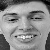

Federico es más parecido a:

1) Federico con una distancia de 2095.2875920562287
2) Mauricio con una distancia de 4441.806813395893
3) Mauricio con una distancia de 4483.132739023874
4) Federico con una distancia de 4535.273491353974
5) Federico con una distancia de 4535.273491353974
6) Gustavo con una distancia de 4623.959865097504
7) Mauricio con una distancia de 4646.1709886355475
8) Gustavo con una distancia de 4668.579580959523
9) Gustavo con una distancia de 4684.564896033989
10) Federico con una distancia de 4687.662527313031


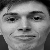

Federico es más parecido a:

1) Federico con una distancia de 2636.383514684765
2) Federico con una distancia de 2717.60047152713
3) Federico con una distancia de 2853.9671849688907
4) Federico con una distancia de 2853.967184968891
5) Federico con una distancia de 2898.175668901062
6) Federico con una distancia de 3105.2704787404064
7) Federico con una distancia de 3307.7499364474534
8) Daniel con una distancia de 3829.1687415262318
9) Daniel con una distancia de 3946.069145361501
10) Gustavo con una distancia de 4011.111712180094


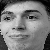

Federico es más parecido a:

1) Federico con una distancia de 4167.374115420575
2) Gustavo con una distancia de 4236.200682783626
3) Gustavo con una distancia de 4318.184997482909
4) Federico con una distancia de 4401.686143557161
5) Federico con una distancia de 4418.09336574389
6) Federico con una distancia de 4418.09336574389
7) Daniel con una distancia de 4433.73668232421
8) José con una distancia de 4492.448108196299
9) Daniel con una distancia de 4507.8928420789325
10) Mauricio con una distancia de 4561.382698440249


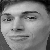

Federico es más parecido a:

1) Mauricio con una distancia de 3913.5241811752626
2) Federico con una distancia de 4050.561707146637
3) Mauricio con una distancia de 4303.555565151623
4) Gustavo con una distancia de 4381.059409018818
5) Federico con una distancia de 4413.881277106865
6) Mauricio con una distancia de 4473.927512081413
7) Gustavo con una distancia de 4483.829561065876
8) Daniel con una distancia de 4499.71617647675
9) Gustavo con una distancia de 4505.161771208602
10) Gustavo con una distancia de 4543.819593529872


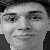

Federico es más parecido a:

1) Federico con una distancia de 2221.5721248511168
2) Federico con una distancia de 2698.3347441973515
3) Federico con una distancia de 2879.070124096098
4) Federico con una distancia de 3164.407792039653
5) Federico con una distancia de 3164.4077920396535
6) Federico con una distancia de 3182.3841396836733
7) Federico con una distancia de 3390.5542912350656
8) Federico con una distancia de 3489.0927068740516
9) Federico con una distancia de 3607.28847352196
10) Federico con una distancia de 3904.0710383688083


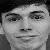

Federico es más parecido a:

1) Alejandro con una distancia de 10033.84087211793
2) Jorgelina con una distancia de 10610.862640077536
3) Federico con una distancia de 3213.746500935219
4) Federico con una distancia de 3330.248832755208
5) Federico con una distancia de 3376.483258709751
6) Federico con una distancia de 3668.7234770280174
7) Federico con una distancia de 3802.015821740945
8) Federico con una distancia de 3828.9782853268744
9) Federico con una distancia de 3917.421140605164
10) Federico con una distancia de 3957.1281034999793


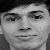

Federico es más parecido a:

1) Jorgelina con una distancia de 10033.238965445405
2) Federico con una distancia de 1854.4619835861365
3) Federico con una distancia de 1878.9839150282714
4) Federico con una distancia de 1957.7098102247749
5) Federico con una distancia de 2097.2909589733267
6) Federico con una distancia de 2144.400036454682
7) Federico con una distancia de 2184.506666016164
8) Federico con una distancia de 2381.4292334258344
9) Federico con una distancia de 2467.3184868225526
10) Federico con una distancia de 2765.4806386400414


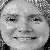

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 3008.8520565794042
2) Jorgelina con una distancia de 3571.301653887955
3) Alejandro con una distancia de 3919.7452808264256
4) Natalia con una distancia de 4002.026889775318
5) Alejandro con una distancia de 4096.823184485877
6) Gustavo con una distancia de 4128.326064116283
7) Guadalupe con una distancia de 4202.865236533584
8) Jorgelina con una distancia de 4221.792263178216
9) Jorgelina con una distancia de 4229.799991547634
10) Natalia con una distancia de 4376.6924378173835


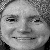

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 1.0273750792541476e-11
2) Guadalupe con una distancia de 4011.3401988227274
3) Guadalupe con una distancia de 4082.1163913105784
4) Jorgelina con una distancia de 4090.4153703627444
5) Jorgelina con una distancia de 4150.109802283134
6) Guadalupe con una distancia de 4414.825592067378
7) Jorgelina con una distancia de 4469.00695724234
8) Guadalupe con una distancia de 4502.445603685503
9) Gustavo con una distancia de 4544.434457906796
10) Guadalupe con una distancia de 4618.699493038348


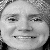

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 1853.6875321455059
2) Jorgelina con una distancia de 2705.703865640334
3) Alejandro con una distancia de 3970.5358231848036
4) Alejandro con una distancia de 4103.359255277717
5) Gustavo con una distancia de 4113.419984443714
6) Jorgelina con una distancia de 4125.9609332708
7) Natalia con una distancia de 4193.276379001504
8) Natalia con una distancia de 4289.247612299969
9) Jorgelina con una distancia de 4361.847357726269
10) Guadalupe con una distancia de 4371.394420725841


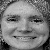

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 3099.7933931502093
2) Jorgelina con una distancia de 3345.9864414635736
3) Jorgelina con una distancia de 3430.0308856083266
4) Guadalupe con una distancia de 3933.1090813454407
5) Gustavo con una distancia de 3962.1673101208803
6) Jorgelina con una distancia de 3971.604648454221
7) Guadalupe con una distancia de 4058.648427348762
8) Jorgelina con una distancia de 4109.206575512292
9) Jorgelina con una distancia de 4129.266169719988
10) Jorgelina con una distancia de 4170.759612642657


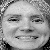

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 4588.167463883661
2) Jorgelina con una distancia de 4637.451542675243
3) Jorgelina con una distancia de 4703.864403800124
4) Jorgelina con una distancia de 4729.911149714521
5) Jorgelina con una distancia de 4763.708197876132
6) Jorgelina con una distancia de 4800.727611787256
7) Guadalupe con una distancia de 4943.2976612244465
8) Guadalupe con una distancia de 5026.04491128708
9) Alejandro con una distancia de 5044.694385563409
10) Guadalupe con una distancia de 5061.928976611559


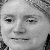

Jorgelina es más parecido a:

1) Gustavo con una distancia de 4031.8469093057683
2) Guadalupe con una distancia de 4121.00661830879
3) Guadalupe con una distancia de 4167.937878548853
4) Guadalupe con una distancia de 4206.129063477038
5) Guadalupe con una distancia de 4228.250136019113
6) Gustavo con una distancia de 4274.631546314336
7) Jorgelina con una distancia de 4279.654851441485
8) Alejandro con una distancia de 4280.506738361827
9) Guadalupe con una distancia de 4282.10692230377
10) Guadalupe con una distancia de 4301.336157609793


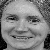

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 1309.1139401720814
2) Jorgelina con una distancia de 1591.8445601599637
3) Jorgelina con una distancia de 2276.0171644874463
4) Jorgelina con una distancia de 2627.593476599758
5) Jorgelina con una distancia de 2822.93689947432
6) Jorgelina con una distancia de 2974.310451458282
7) Jorgelina con una distancia de 3246.660256310177
8) Jorgelina con una distancia de 3496.20670286619
9) Jorgelina con una distancia de 3694.8176808964795
10) Gustavo con una distancia de 3844.3863491038005


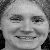

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 1777.917808806885
2) Jorgelina con una distancia de 2483.468020770425
3) Jorgelina con una distancia de 2535.1814744234402
4) Jorgelina con una distancia de 2675.8350142733157
5) Jorgelina con una distancia de 2803.3041817389535
6) Jorgelina con una distancia de 2867.9000753467703
7) Jorgelina con una distancia de 2938.0450749456672
8) Natalia con una distancia de 3344.5488708083103
9) Jorgelina con una distancia de 3607.4595076443748
10) Guadalupe con una distancia de 3739.0540795121583


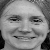

Jorgelina es más parecido a:

1) Jorgelina con una distancia de 2830.006464427929
2) Jorgelina con una distancia de 3124.1378447557163
3) Jorgelina con una distancia de 3211.074714385147
4) Jorgelina con una distancia de 3285.5912551950187
5) Jorgelina con una distancia de 3344.721191495001
6) Jorgelina con una distancia de 3395.6547997564758
7) Jorgelina con una distancia de 3433.862201854806
8) Jorgelina con una distancia de 3574.778394401782
9) Jorgelina con una distancia de 3582.9706326579894
10) Guadalupe con una distancia de 3690.947905503906


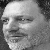

Gustavo es más parecido a:

1) Gustavo con una distancia de 2871.0609015502177
2) Gustavo con una distancia de 3030.4963215470857
3) Gustavo con una distancia de 3358.7899464515244
4) Gustavo con una distancia de 3468.2791605062675
5) Gustavo con una distancia de 3588.8013682810215
6) Mauricio con una distancia de 3606.96503397092
7) Gustavo con una distancia de 3618.665875191043
8) Gustavo con una distancia de 3625.027820956615
9) Gustavo con una distancia de 3881.095249343641
10) Gustavo con una distancia de 3940.6676572216757


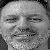

Gustavo es más parecido a:

1) Gustavo con una distancia de 2124.537223145734
2) Gustavo con una distancia de 2482.1748466759545
3) Gustavo con una distancia de 2604.0479703965707
4) Gustavo con una distancia de 2866.542001668146
5) Gustavo con una distancia de 2997.008166398722
6) Gustavo con una distancia de 3074.218634634891
7) Gustavo con una distancia de 3174.643467621482
8) Gustavo con una distancia de 3222.3097794649893
9) Gustavo con una distancia de 3255.9702152326267
10) Gustavo con una distancia de 3258.846696388909


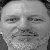

Gustavo es más parecido a:

1) Gustavo con una distancia de 2819.6258665484706
2) Gustavo con una distancia de 3042.283518752359
3) Gustavo con una distancia de 3065.4235627025146
4) Gustavo con una distancia de 3128.08914718714
5) Gustavo con una distancia de 3135.4529012016674
6) Gustavo con una distancia de 3176.1929592483884
7) Gustavo con una distancia de 3240.6792314418626
8) Gustavo con una distancia de 3274.2866518383466
9) Gustavo con una distancia de 3294.8915756249944
10) Gustavo con una distancia de 3333.0720056754894


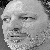

Gustavo es más parecido a:

1) Gustavo con una distancia de 3498.2659479140507
2) Gustavo con una distancia de 3640.4321490166335
3) Mauricio con una distancia de 3716.1278755224344
4) Gustavo con una distancia de 3744.1191757999413
5) Gustavo con una distancia de 3806.36777564597
6) Mauricio con una distancia de 3866.677349714289
7) Gustavo con una distancia de 3899.5567858346985
8) Gustavo con una distancia de 4117.861717420938
9) Gustavo con una distancia de 4135.430873106774
10) Mauricio con una distancia de 4146.9919969787215


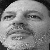

Gustavo es más parecido a:

1) Gustavo con una distancia de 3234.791855600207
2) Gustavo con una distancia de 3361.3109360630856
3) Gustavo con una distancia de 3648.8665187164434
4) Gustavo con una distancia de 3664.302127164219
5) Gustavo con una distancia de 3664.7281143459486
6) Gustavo con una distancia de 3678.294567863672
7) Gustavo con una distancia de 3682.4863805862688
8) Gustavo con una distancia de 3690.4361687059054
9) Gustavo con una distancia de 3728.1571022164794
10) Daniel con una distancia de 3739.046271539191


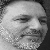

Gustavo es más parecido a:

1) Gustavo con una distancia de 2504.4093964722424
2) Gustavo con una distancia de 2567.6050511057992
3) Gustavo con una distancia de 3057.4799765057637
4) Gustavo con una distancia de 3272.647420117557
5) Gustavo con una distancia de 3620.7098180938096
6) Daniel con una distancia de 3627.2097661969124
7) Gustavo con una distancia de 3629.3715631861937
8) Daniel con una distancia de 3883.8977771603377
9) Gustavo con una distancia de 3994.1081831644733
10) Gustavo con una distancia de 4171.677394272198


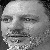

Gustavo es más parecido a:

1) Gustavo con una distancia de 1890.5808590915176
2) Gustavo con una distancia de 2504.719477258948
3) Gustavo con una distancia de 2904.211950381025
4) Gustavo con una distancia de 2961.101394830051
5) Gustavo con una distancia de 3057.622794307208
6) Gustavo con una distancia de 3710.5571690952625
7) Gustavo con una distancia de 3750.03555621217
8) Gustavo con una distancia de 3761.382921558518
9) Gustavo con una distancia de 3865.9045905017942
10) Gustavo con una distancia de 3938.534098735557


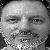

Gustavo es más parecido a:

1) Gustavo con una distancia de 2692.6076809756573
2) Gustavo con una distancia de 2876.4554803877863
3) Gustavo con una distancia de 3172.007203441574
4) Gustavo con una distancia de 3231.6932948251356
5) Gustavo con una distancia de 3244.3738017383052
6) Gustavo con una distancia de 3256.994811352091
7) Gustavo con una distancia de 3416.909906178076
8) Gustavo con una distancia de 3450.611192610725
9) Gustavo con una distancia de 3723.1283243309717
10) Gustavo con una distancia de 3761.7842702792227


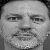

Gustavo es más parecido a:

1) Gustavo con una distancia de 1047.6247345513043
2) Gustavo con una distancia de 1092.457559718838
3) Gustavo con una distancia de 2009.2281587019118
4) Gustavo con una distancia de 2428.1904453265793
5) Gustavo con una distancia de 2939.7075552673705
6) Daniel con una distancia de 3564.793990656262
7) Gustavo con una distancia de 3666.6256295578787
8) Gustavo con una distancia de 3711.305528062567
9) Gustavo con una distancia de 3761.9918226751142
10) Mauricio con una distancia de 3796.1944201767724


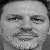

Gustavo es más parecido a:

1) Gustavo con una distancia de 1397.0955158531806
2) Gustavo con una distancia de 1457.9582859049544
3) Gustavo con una distancia de 2204.7361108334258
4) Gustavo con una distancia de 2371.613135619563
5) Gustavo con una distancia de 3248.034901051646
6) Daniel con una distancia de 3589.3330473689016
7) Gustavo con una distancia de 3616.764739414685
8) Gustavo con una distancia de 3731.2164416696874
9) Gustavo con una distancia de 3740.6715783107525
10) Gustavo con una distancia de 3787.042920624541


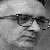

Cristian es más parecido a:

1) Cristian con una distancia de 1202.7215250694328
2) Cristian con una distancia de 2496.357462126462
3) Cristian con una distancia de 3112.582252167648
4) Cristian con una distancia de 3311.289764852672
5) Cristian con una distancia de 3493.5116478856044
6) Cristian con una distancia de 3493.5116478856044
7) Cristian con una distancia de 3973.2880089741875
8) Cristian con una distancia de 4064.671851852463
9) Cristian con una distancia de 4119.091460123615
10) Alejandro con una distancia de 4122.713305040677


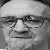

Cristian es más parecido a:

1) Cristian con una distancia de 2235.505305883377
2) Cristian con una distancia de 3249.399842057654
3) Cristian con una distancia de 3844.7704974963513
4) Cristian con una distancia de 3888.8697859890067
5) Cristian con una distancia de 3888.869785989007
6) Cristian con una distancia de 4169.97784973385
7) Cristian con una distancia de 4260.698434263037
8) Cristian con una distancia de 4313.717494311553
9) Cristian con una distancia de 4316.9196680310015
10) Gustavo con una distancia de 4323.033678776705


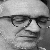

Cristian es más parecido a:

1) Cristian con una distancia de 2655.687849354593
2) Cristian con una distancia de 2990.682743610545
3) Cristian con una distancia de 3240.7006195731333
4) Cristian con una distancia de 3462.976029973859
5) Cristian con una distancia de 3462.9760299738596
6) Cristian con una distancia de 3555.1175731559156
7) Alejandro con una distancia de 3707.3154145485078
8) Cristian con una distancia de 3781.6382247247616
9) Alejandro con una distancia de 3874.489713271018
10) Cristian con una distancia de 3960.5730156434893


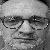

Cristian es más parecido a:

1) Cristian con una distancia de 2210.0918229220274
2) Cristian con una distancia de 2272.358452513859
3) Cristian con una distancia de 2272.3584525138594
4) Cristian con una distancia de 2869.5035443847632
5) Alejandro con una distancia de 3075.497952025528
6) Cristian con una distancia de 3110.320024130469
7) Gustavo con una distancia de 3416.8448589863933
8) Cristian con una distancia de 3418.306216387988
9) Cristian con una distancia de 3474.282021060273
10) Alejandro con una distancia de 3562.295423358963


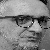

Cristian es más parecido a:

1) Cristian con una distancia de 2965.2054800515125
2) Cristian con una distancia de 3025.5077550302267
3) Cristian con una distancia de 3796.806191154799
4) Cristian con una distancia de 3829.382903619651
5) Cristian con una distancia de 4032.0880302099476
6) Cristian con una distancia de 4032.0880302099476
7) Alejandro con una distancia de 4073.5168827468524
8) Alejandro con una distancia de 4085.2403166042704
9) Alejandro con una distancia de 4151.665315222239
10) Alejandro con una distancia de 4317.639207288144


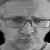

Cristian es más parecido a:

1) Cristian con una distancia de 3242.776889737081
2) Cristian con una distancia de 4032.836075062781
3) Alejandro con una distancia de 4124.42201634526
4) Alejandro con una distancia de 4129.677680023515
5) Alejandro con una distancia de 4147.315745611004
6) Cristian con una distancia de 4201.6773732535685
7) Alejandro con una distancia de 4209.052443940424
8) Cristian con una distancia de 4258.222498882954
9) Alejandro con una distancia de 4262.7269805927635
10) Alejandro con una distancia de 4330.406126125145


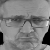

Cristian es más parecido a:

1) Cristian con una distancia de 4177.620487673123
2) Cristian con una distancia de 4511.349465047451
3) Cristian con una distancia de 4677.3397499185985
4) Guadalupe con una distancia de 4816.078628012344
5) Cristian con una distancia de 4889.880252865063
6) Gustavo con una distancia de 4922.837810155126
7) Guadalupe con una distancia de 4961.439172713512
8) Alejandro con una distancia de 4977.584418435141
9) Alejandro con una distancia de 4978.871203261088
10) Jorgelina con una distancia de 4984.884788341022


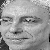

Alejandro es más parecido a:

1) Alejandro con una distancia de 2966.039115894119
2) Alejandro con una distancia de 3464.8262797276966
3) Alejandro con una distancia de 4265.457389920335
4) Jorgelina con una distancia de 4441.403140239703
5) Alejandro con una distancia de 4461.239398842214
6) Gustavo con una distancia de 4552.768681866819
7) Alejandro con una distancia de 4737.061462229672
8) Gustavo con una distancia de 4739.084737167361
9) Jorgelina con una distancia de 4839.709289640514
10) Alejandro con una distancia de 4928.163261443449


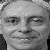

Alejandro es más parecido a:

1) Alejandro con una distancia de 1378.8808317004984
2) Alejandro con una distancia de 3545.3057142553935
3) Alejandro con una distancia de 3921.62398307784
4) Alejandro con una distancia de 4252.710743908373
5) Guadalupe con una distancia de 4278.142706292632
6) Gustavo con una distancia de 4377.849064816327
7) Alejandro con una distancia de 4440.327830009435
8) Alejandro con una distancia de 4444.333361795345
9) Guadalupe con una distancia de 4455.518572764685
10) Guadalupe con una distancia de 4473.232464583566


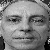

Alejandro es más parecido a:

1) Alejandro con una distancia de 4033.923289827802
2) Alejandro con una distancia de 4132.972464862134
3) Guadalupe con una distancia de 4188.749595112059
4) Guadalupe con una distancia de 4306.747601387772
5) Jorgelina con una distancia de 4311.306099033665
6) Jorgelina con una distancia de 4317.711334034822
7) Guadalupe con una distancia de 4353.858112526278
8) Jorgelina con una distancia de 4410.173532035828
9) Gustavo con una distancia de 4429.391067074034
10) Gustavo con una distancia de 4466.483691989318


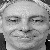

Alejandro es más parecido a:

1) Alejandro con una distancia de 1955.9352696001588
2) Alejandro con una distancia de 2911.464030548419
3) Alejandro con una distancia de 3392.67092665318
4) Alejandro con una distancia de 3658.073840640213
5) Alejandro con una distancia de 3724.9637121150618
6) Alejandro con una distancia de 3766.2082012896803
7) Alejandro con una distancia de 3791.555891192815
8) Guadalupe con una distancia de 3819.966830271464
9) Guadalupe con una distancia de 3919.9721165461733
10) Gustavo con una distancia de 3973.11510390224


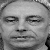

Alejandro es más parecido a:

1) Alejandro con una distancia de 1869.067644005372
2) Alejandro con una distancia de 2398.513397997874
3) Alejandro con una distancia de 2532.951229461508
4) Alejandro con una distancia de 2877.147532264536
5) Alejandro con una distancia de 3511.8676121175176
6) Alejandro con una distancia de 3821.515065962434
7) Alejandro con una distancia de 3872.8350636644313
8) Cristian con una distancia de 4265.355676395347
9) Gustavo con una distancia de 4327.94020013718
10) Cristian con una distancia de 4389.206059703305


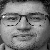

Daniel es más parecido a:

1) Daniel con una distancia de 2313.3874813810567
2) Daniel con una distancia de 2433.2782973002677
3) Daniel con una distancia de 2973.1240538202237
4) Mauricio con una distancia de 3470.0181948397253
5) Gustavo con una distancia de 3511.9072212116753
6) Daniel con una distancia de 3526.001335946371
7) Daniel con una distancia de 3532.7028924571887
8) Gustavo con una distancia de 3602.405603451641
9) Mauricio con una distancia de 3628.583540295997
10) Mauricio con una distancia de 3694.7615847513816


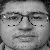

Daniel es más parecido a:

1) Daniel con una distancia de 2842.042966368736
2) Daniel con una distancia de 3535.668564575114
3) Daniel con una distancia de 3607.9594408794765
4) Gustavo con una distancia de 3703.4188791427064
5) Daniel con una distancia de 3716.18976645217
6) Mauricio con una distancia de 3725.4744529093296
7) Gustavo con una distancia de 3837.306025594635
8) Daniel con una distancia de 3868.939041797275
9) Gustavo con una distancia de 3952.7920743686373
10) Gustavo con una distancia de 3955.066179541065


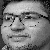

Daniel es más parecido a:

1) Federico con una distancia de 4352.892439697524
2) Gustavo con una distancia de 4402.1215318506165
3) Daniel con una distancia de 4413.827242602073
4) Daniel con una distancia de 4422.608796471529
5) Mauricio con una distancia de 4444.731372349925
6) Gustavo con una distancia de 4463.975242223588
7) Noelia M con una distancia de 4490.435203490494
8) Gustavo con una distancia de 4551.972408634157
9) Gustavo con una distancia de 4592.030649584144
10) Gustavo con una distancia de 4667.5251726104425


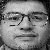

Daniel es más parecido a:

1) Daniel con una distancia de 3215.958867308929
2) Gustavo con una distancia de 3595.243003418083
3) Daniel con una distancia de 3741.2101322337217
4) Daniel con una distancia de 3756.8817003240156
5) Gustavo con una distancia de 3842.6216534168702
6) Gustavo con una distancia de 3895.676787618026
7) Daniel con una distancia de 4031.253259298251
8) Gustavo con una distancia de 4037.398358755512
9) Gustavo con una distancia de 4092.124513842631
10) Gustavo con una distancia de 4192.618224986818


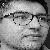

Daniel es más parecido a:

1) Gustavo con una distancia de 4124.176693998685
2) Gustavo con una distancia de 4162.980144536471
3) Federico con una distancia de 4598.433870239508
4) Daniel con una distancia de 4692.418028295038
5) Mauricio con una distancia de 4809.36630458272
6) Gustavo con una distancia de 4855.409333671366
7) Gustavo con una distancia de 4870.247623522235
8) Daniel con una distancia de 4876.485545984729
9) Gustavo con una distancia de 4883.745827894847
10) Gustavo con una distancia de 4997.775901712139


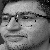

Daniel es más parecido a:

1) Daniel con una distancia de 4084.985258214427
2) Federico con una distancia de 4639.287669041382
3) Gustavo con una distancia de 4714.060255687161
4) Gustavo con una distancia de 4848.758001839725
5) Federico con una distancia de 4852.004015131599
6) Noelia M con una distancia de 4869.329678739028
7) Daniel con una distancia de 4904.154088185703
8) Noelia M con una distancia de 4964.710278859206
9) Gustavo con una distancia de 4973.741653393864
10) Daniel con una distancia de 4977.952971094795


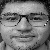

Daniel es más parecido a:

1) Daniel con una distancia de 3152.0107004933766
2) Daniel con una distancia de 3299.575369526277
3) Daniel con una distancia de 3357.062146494485
4) Daniel con una distancia de 3422.2282519219525
5) Daniel con una distancia de 3647.9349860184693
6) Gustavo con una distancia de 3794.1738663009282
7) Gustavo con una distancia de 3843.833375689376
8) Mauricio con una distancia de 3881.412726502075
9) Gustavo con una distancia de 3934.2893037844374
10) Mauricio con una distancia de 3959.5476418600338


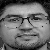

Daniel es más parecido a:

1) Daniel con una distancia de 2293.423540755854
2) Daniel con una distancia de 2450.078179943698
3) Daniel con una distancia de 2477.3496510311375
4) Daniel con una distancia de 2748.997763204416
5) Daniel con una distancia de 2966.4018492549826
6) Federico con una distancia de 4222.779373188614
7) Federico con una distancia de 4243.264868881131
8) Federico con una distancia de 4255.195839122155
9) Federico con una distancia de 4270.063212910234
10) Federico con una distancia de 4274.794333740683


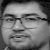

Daniel es más parecido a:

1) Daniel con una distancia de 2982.336321010145
2) Daniel con una distancia de 3277.4468318057952
3) Daniel con una distancia de 3691.108677323644
4) Daniel con una distancia de 4144.826058968649
5) Daniel con una distancia de 4145.235685891157
6) Daniel con una distancia de 4154.227624686425
7) Federico con una distancia de 4476.734551992062
8) Gabriel con una distancia de 4526.747177754085
9) Gabriel con una distancia de 4550.5397944242395
10) Mauricio con una distancia de 4633.355157612789


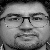

Daniel es más parecido a:

1) Daniel con una distancia de 1051.1292262009824
2) Daniel con una distancia de 1414.5819201764427
3) Daniel con una distancia de 1712.9495852867808
4) Daniel con una distancia de 2548.797781259295
5) Daniel con una distancia de 3238.52027606253
6) Gustavo con una distancia de 4170.033064731725
7) Gustavo con una distancia de 4259.705445545998
8) Daniel con una distancia de 4278.829395508852
9) Gustavo con una distancia de 4361.179594896741
10) Federico con una distancia de 4380.540252984584


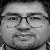

Daniel es más parecido a:

1) Daniel con una distancia de 1439.2200164829785
2) Daniel con una distancia de 1664.028281934684
3) Daniel con una distancia de 2279.7888602411235
4) Daniel con una distancia de 2611.7994233822137
5) Daniel con una distancia de 2732.697435915456
6) Gustavo con una distancia de 3982.0446218061043
7) Daniel con una distancia de 4078.808831727549
8) Gustavo con una distancia de 4089.003405179703
9) Gustavo con una distancia de 4128.209391418685
10) Daniel con una distancia de 4239.1765821152585


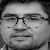

Daniel es más parecido a:

1) Daniel con una distancia de 1195.7217041993968
2) Daniel con una distancia de 1807.9958183713036
3) Daniel con una distancia de 2558.290741431886
4) Daniel con una distancia de 2709.8263404911067
5) Daniel con una distancia de 3014.75884780762
6) Daniel con una distancia de 3919.3937448185075
7) Daniel con una distancia de 4188.102625997914
8) Gustavo con una distancia de 4264.121658679922
9) Federico con una distancia de 4339.44193407774
10) Daniel con una distancia de 4434.245060695806

 El porcentaje de aciertos es 82.10526315789474%


In [ ]:
cont = 0
for i in range(len(data_testing)):
  cont += validacion_ISOMAP(isomap, data_testing[i], test_nombres[i], output_isomap_training, train_nombres)

print(f"\n El porcentaje de aciertos es {cont/len(data_testing)*100}%")

# Sección extra para los curiosos

## Cálculo de distancias entre caras

Las 2 personas con la cara más parecida son Guadalupe y Alejandro, con una distancia de 3708.937314110337


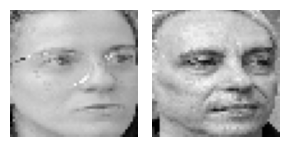


Considerando a las 50 caras más parecidas se obtienen estos resultados:
Combinación Guadalupe-Alejandro: 4 veces
Combinación Guadalupe-Gustavo: 21 veces
Combinación Guadalupe-Daniel: 9 veces
Combinación Guadalupe-Jorgelina: 3 veces
Combinación Guadalupe-Mauricio: 6 veces
Combinación Guadalupe-Federico: 2 veces
Combinación Guadalupe-Noelia M: 3 veces
Combinación Guadalupe-Noelia R: 1 veces
Combinación Guadalupe-Cristian: 1 veces

Las 2 personas con la cara más diferente son Noelia M y Natalia, con una distancia de 10319.048308831585


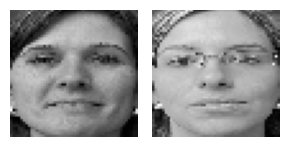


Considerando a las 50 caras más diferentes se obtienen estos resultados:
Combinación Noelia M-Natalia: 10 veces
Combinación Guadalupe-Jorgelina: 2 veces
Combinación Guadalupe-Natalia: 16 veces
Combinación Guadalupe-Alejandro: 11 veces
Combinación Gustavo-Alejandro: 1 veces
Combinación Jorgelina-Alejandro: 3 veces
Combinación Cristian-Alejandro: 4 veces
Combinación Federico-Alejandro: 1 veces
Combinación Noelia R-Alejandro: 1 veces
Combinación Noelia R-Jorgelina: 1 veces


In [ ]:
from collections import defaultdict
distancia = []

for i in range(len(caras)):
  for j in range(len(caras)):
    if (i < j and caras[i][1]!=caras[j][1]):
      distancia.append([np.linalg.norm(caras[i][0] - caras[j][0]), caras[i], caras[j]])

distancia.sort(key = lambda x: x[0])

print(f"Las 2 personas con la cara más parecida son {distancia[0][1][1]} y {distancia[0][2][1]}, con una distancia de {distancia[0][0]}")
fig, axs = plt.subplots(1, 2, figsize=(3, 2))
axs[0].imshow(distancia[0][1][0].reshape(50,50), cmap='gray')
axs[0].axis('off')
axs[1].imshow(distancia[0][2][0].reshape(50,50), cmap='gray')
axs[1].axis('off')

plt.tight_layout()
plt.show()

print("\nConsiderando a las 50 caras más parecidas se obtienen estos resultados:")
# Diccionario para contar ocurrencias
contador = defaultdict(int)

for i in range(50):
    clave = distancia[i][1][1]+"-"+distancia[i][2][1]  # Tomamos los nombres de las personas
    contador[clave] += 1

# Mostramos los resultados
for clave, cantidad in contador.items():
    print(f"Combinación {clave}: {cantidad} veces")

# Más diferentes
print(f"\nLas 2 personas con la cara más diferente son {distancia[-1][1][1]} y {distancia[-1][2][1]}, con una distancia de {distancia[-1][0]}")
fig, axs = plt.subplots(1, 2, figsize=(3, 2))
axs[0].imshow(distancia[-1][1][0].reshape(50,50), cmap='gray')
axs[0].axis('off')
axs[1].imshow(distancia[-1][2][0].reshape(50,50), cmap='gray')
axs[1].axis('off')

plt.tight_layout()
plt.show()

print("\nConsiderando a las 50 caras más diferentes se obtienen estos resultados:")
# Diccionario para contar ocurrencias de
contador = defaultdict(int)

for i in range(50):
    clave = distancia[-(i+1)][1][1]+"-"+distancia[-(i+1)][2][1]  # Tomamos los nombres de las personas
    contador[clave] += 1

# Mostramos los resultados
for clave, cantidad in contador.items():
    print(f"Combinación {clave}: {cantidad} veces")

## Análisis de componentes principales

In [ ]:
# Paso todas las caras a una lista para despues trabajarlas abajo
data_matrix = []
for i in range(len(train_caras)):
  data_matrix.append(train_caras[i])

In [ ]:
# Convertimos la lista en una matriz de tamaño (n, 2500)
data_matrix = np.vstack(data_matrix)

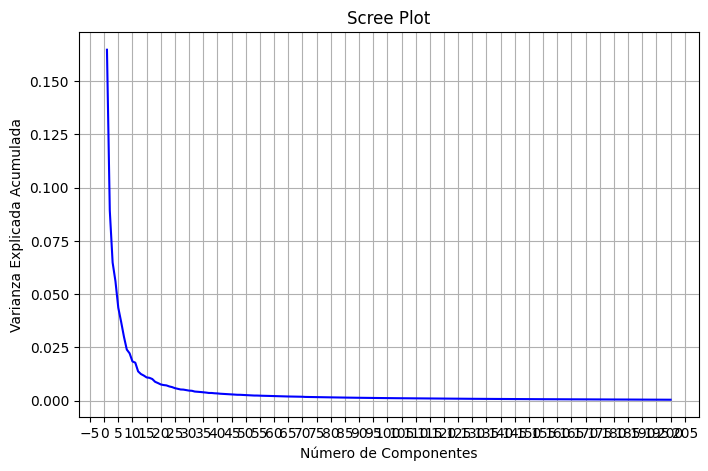

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MultipleLocator

# Estandarizar los datos -- Será necesario? Todo está medido en la misma escala de grises asi q no se si tiene sentido
scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_matrix)
data_scaled = data_matrix

# Aplicar PCA (Reduciendo a 100 componentes)
pca = PCA(n_components=200)
data_pca = pca.fit_transform(data_scaled)

# Obtener los vectores de carga
loading_vectors = pca.components_

# Obtener la varianza explicada acumulativa
cumulative_variance = pca.explained_variance_ratio_

# Graficar Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,  linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot')
plt.grid()

# Configurar el eje X para que solo tenga marcas en los números enteros
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_locator(MultipleLocator(5))  # Marcas cada 5 unidades

plt.show()

In [ ]:
# Cantidad de componentes para explicar el 90% de la variabilidad
total = 0
cont = 0
while total<.9:
  total += pca.explained_variance_ratio_[cont]
  cont += 1
print(f"Se necesitan {cont} componentes para explicar el 90% de la variabilidad")

Se necesitan 119 componentes para explicar el 90% de la variabilidad


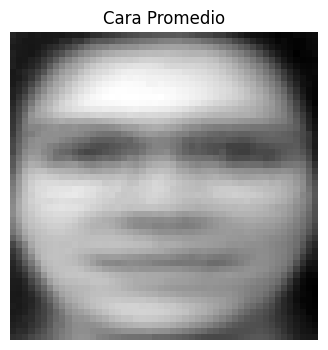

In [ ]:
plt.figure(figsize=(4, 4)) # Increase the figure size
plt.title("Cara Promedio")
plt.imshow(pca.mean_.reshape(50,50), cmap='gray')
plt.axis('off')
plt.show()

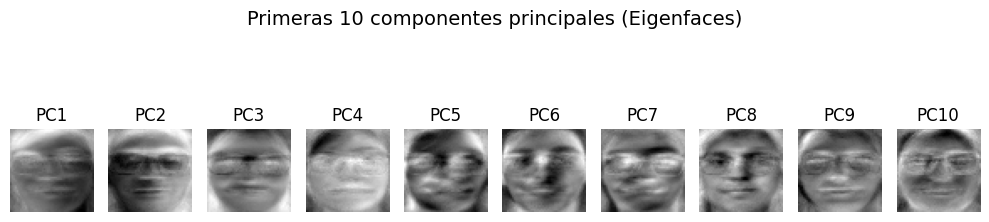

In [ ]:
k = 10  # Número de componentes principales a visualizar
fig, axs = plt.subplots(1, k, figsize=(10, 3))
fig.suptitle(f"Primeras {k} componentes principales (Eigenfaces)", fontsize=14)
for i in range(k):
    eigenface = pca.components_[i].reshape(50, 50)
    axs[i].imshow(eigenface, cmap='gray')
    axs[i].set_title(f"PC{i+1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

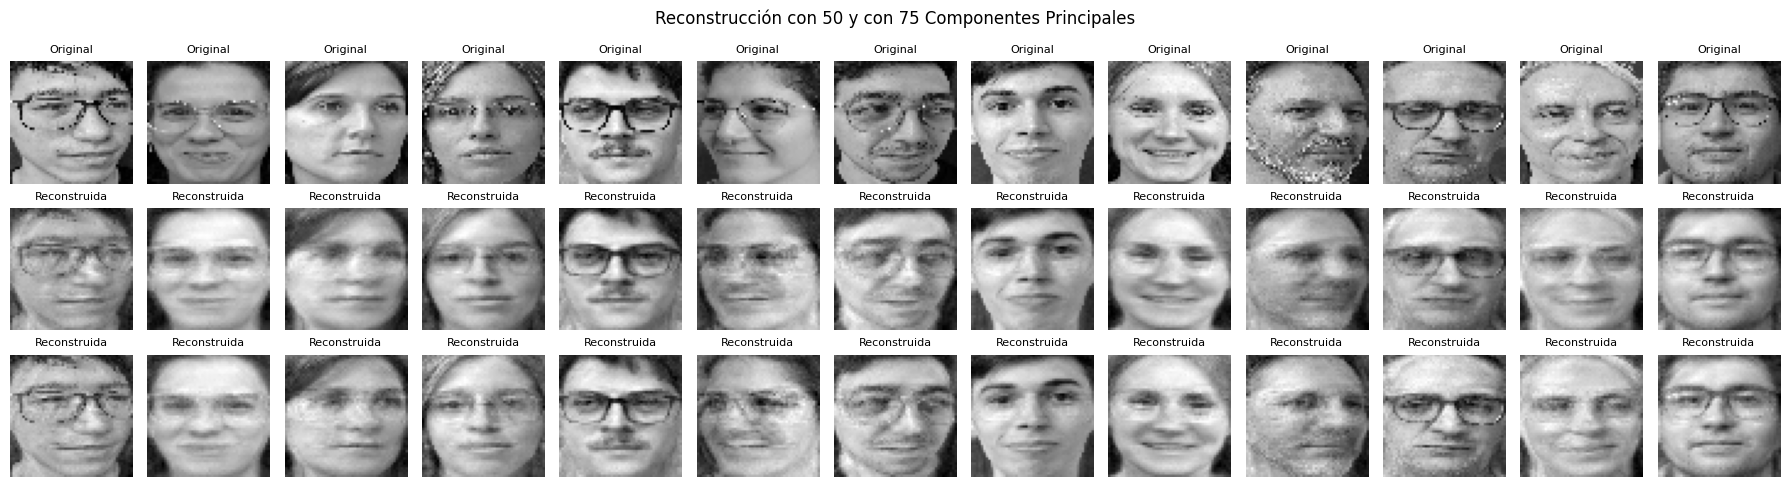

In [ ]:
# Reconstrucción de caras
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(data_scaled)

X_train_reconstructed_50 = pca_50.inverse_transform(X_train_pca_50)

pca_75 = PCA(n_components=75)
X_train_pca_75 = pca_75.fit_transform(data_scaled)

X_train_reconstructed_75 = pca_75.inverse_transform(X_train_pca_75)

import matplotlib.pyplot as plt

n = 13  # cantidad de imágenes a mostrar
a = [0,54,71,99,120,147,174,200,250,277,291,312,344]
fig, axs = plt.subplots(3, n, figsize=(18, 5))

for i in range(n):
    # Original
    axs[0, i].imshow(data_scaled[a[i]].reshape(50, 50), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title("Original", fontsize=8)

    # Reconstruida con 50
    axs[1, i].imshow(X_train_reconstructed_50[a[i]].reshape(50, 50), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title("Reconstruida", fontsize=8)

    # Reconstruida con 75
    axs[2, i].imshow(X_train_reconstructed_75[a[i]].reshape(50, 50), cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title("Reconstruida", fontsize=8)

plt.suptitle("Reconstrucción con 50 y con 75 Componentes Principales", fontsize=12)
plt.tight_layout()
plt.show()

## Clustering de parecidos usando 20 componentes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

pca_20 = PCA(n_components=20)
X_train_pca_20 = pca_20.fit_transform(data_scaled)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=777)

# Fit the model to the data
kmeans.fit(X_train_pca_20)

# Get cluster labels and centroids
labels = kmeans.labels_  # Labels for each data point
centroids = kmeans.cluster_centers_  # Cluster centers

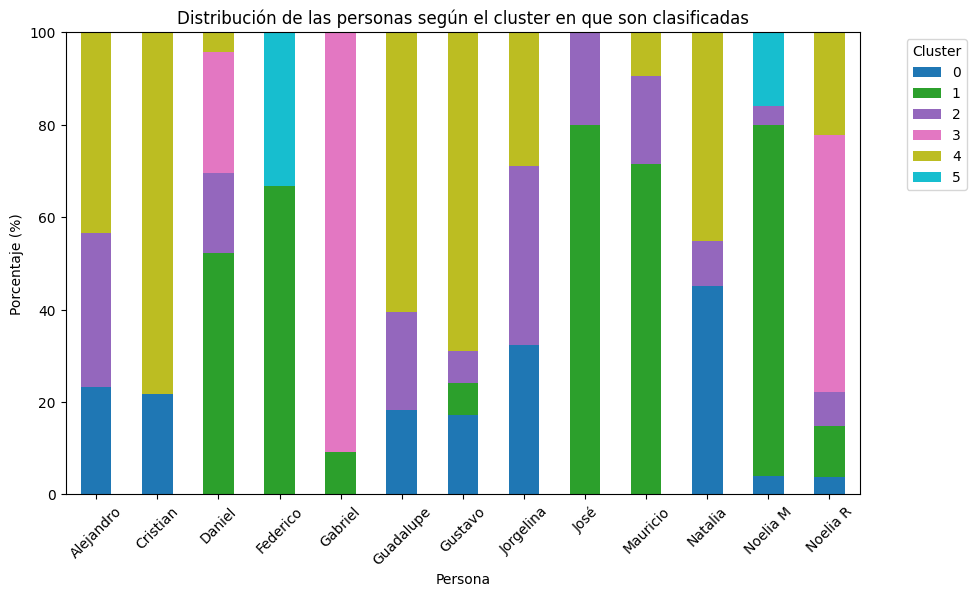

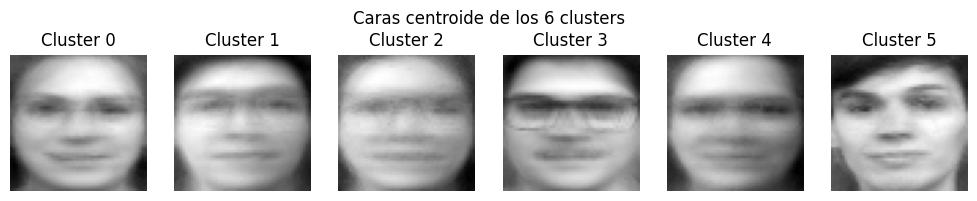

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame
df = pd.DataFrame({"Nombre": train_nombres, "Cluster": labels})

# Contar ocurrencias por categoría y etiqueta
df_grouped = df.groupby(["Nombre", "Cluster"]).size().unstack(fill_value=0)

# Convertir los conteos en porcentajes (cada barra suma 100%)
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas (100%)
df_percent.plot(kind="bar", stacked=True, figsize=(10.25, 6), colormap="tab10")

# Personalizar gráfico
plt.xlabel("Persona")
plt.ylabel("Porcentaje (%)")
plt.title("Distribución de las personas según el cluster en que son clasificadas")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Limitar eje Y al 100%

plt.show()

# Caras reconstruidas por cluster
centroids_reconstructed = pca_20.inverse_transform(centroids)

fig, axs = plt.subplots(1, 6, figsize=(10, 2))

for i in range(len(centroids_reconstructed)):

    # Reconstruida con 50
    axs[i].imshow(centroids_reconstructed[i].reshape(50, 50), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Cluster {i}")

plt.suptitle("Caras centroide de los 6 clusters", fontsize=12)
plt.tight_layout()
plt.show()